# Imports

In [1]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json
from scipy.integrate import trapz

#Import all the necessary CLAW libraries
import create_directory
import CLAW
import matplotlib.pyplot as plt
import warnings

import OzESI_CLAW

import re
from sklearn.mixture import GaussianMixture
import tqdm

import OzESI_CLAW
import OzESI
import OzESI_plot
import OzESI_compare

#version 2
import OzESI_v2

# Import the create_folder function from OzESI_utils
from OzESI_utils import create_folder

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
name_of_project = 'AMP'


# Separate OzON and OzOFF mzml files incase they weren't seprated before

In [2]:
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

The directory 'Projects/AMP/mzml' does not exist. Please try again with a valid directory.


# Database location, CLAW preparsing setup - ON/OFF switch

In [3]:
# # Define the mode: 'ON' or 'OFF'
# mode = 'ON'  # Change to 'OFF' as needed

# # Set default values based on the mode
# if mode == 'ON':
#     data_base_name_location = 'lipid_database/AMP_Database_OzON.xlsx'
#     Project = './Projects/'
#     Project_Name = 'AMP'
#     Project_Folder_data = f'{Project}{Project_Name}/test3/'
#     Project_results = f'{Project}{Project_Name}/results/test3/'
#     file_name_to_save = 'AMP'
#     tolerance = 0.3
#     remove_std = True
#     save_data = True
#     csv_data_folder = f'{Project_results}csv_data/'
#     base_plot_directory = f'Projects/{Project_Name}/results/plots/on/'
#     project_results_directory = f'Projects/{Project_Name}/results/test3/'
#     save_df_name = 'test3_ON.csv'
#     plots_directory = f'Projects/{Project_Name}/results/test3/plots/on/'
#     file_name = 'test3_ON.csv'
# else:
#     data_base_name_location = 'lipid_database/AMP_Database_OzOFF.xlsx'
#     Project = './Projects/'
#     Project_Name = 'AMP'
#     Project_Folder_data = f'{Project}{Project_Name}/test3/'
#     Project_results = f'{Project}{Project_Name}/results/test3/'
#     file_name_to_save = 'AMP'
#     tolerance = 0.3
#     remove_std = True
#     save_data = True
#     csv_data_folder = f'{Project_results}csv_data/'
#     base_plot_directory = f'Projects/{Project_Name}/results/plots/off/'
#     project_results_directory = f'Projects/{Project_Name}/results/test3/'
#     save_df_name = 'test3_OFF.csv'
#     plots_directory = f'Projects/{Project_Name}/results/test3/plots/off/'
#     file_name = 'test3_OFF.csv'

# # Define the directory and file names
# ozone_compare_directory = f'Projects/{Project_Name}/results/test3/'

# # Save RawDataParser output CSV file
# output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"
# raw_data_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"

# # Path to the PeakAnalysis output CSV file
# peak_analysis_csv = f"{csv_data_folder}{file_name_to_save}_PeakAnalysis_{mode}.csv"

# # Paths to the CSV files
# mrm_csv_path = f'{csv_data_folder}df_MRM_{mode}.csv'
# oze_esi_csv_path = f'{csv_data_folder}df_OzESI_{mode}.csv'

# # Path to OzoneCompare files
# ozone_compare_csv = f'{ozone_compare_directory}OzoneCompare_{mode}.csv'

# # Call pre_parsing_setup to initialize the variables
# data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = OzESI_CLAW.pre_parsing_setup(data_base_name_location,
#  Project, 
#  Project_Name, 
#  Project_Folder_data,
#  Project_results, 
#  file_name_to_save, 
#  tolerance, 
#  remove_std,
#  save_data)



In [4]:
# Define the mode: 'ON' or 'OFF'
mode = 'ON'  # Change to 'OFF' as needed

# Set default values based on the mode
if mode == 'ON':
    data_base_name_location = 'lipid_database/AMP_Database_OzON.xlsx'
    Project = './Projects/'
    Project_Name = 'AMP'
    Project_Folder_data = f'{Project}{Project_Name}/fame_mix/on/'
    Project_results = f'{Project}{Project_Name}/results/fame_mix/'
    file_name_to_save = 'AMP'
    tolerance = 0.3
    remove_std = True
    save_data = True
    csv_data_folder = f'{Project_results}csv_data/'
    base_plot_directory = f'Projects/{Project_Name}/results/plots/on/'
    project_results_directory = f'Projects/{Project_Name}/results/fame_mix/'
    save_df_name = 'fame_mix_ON.csv'
    plots_directory = f'Projects/{Project_Name}/results/fame_mix/plots/on/'
    file_name = 'fame_mix_ON.csv'
else:
    data_base_name_location = 'lipid_database/AMP_Database_OzOFF.xlsx'
    Project = './Projects/'
    Project_Name = 'AMP'
    Project_Folder_data = f'{Project}{Project_Name}/fame_mix/off/'
    Project_results = f'{Project}{Project_Name}/results/fame_mix/'
    file_name_to_save = 'AMP'
    tolerance = 0.3
    remove_std = True
    save_data = True
    csv_data_folder = f'{Project_results}csv_data/'
    base_plot_directory = f'Projects/{Project_Name}/results/plots/off/'
    project_results_directory = f'Projects/{Project_Name}/results/fame_mix/'
    save_df_name = 'fame_mix_OFF.csv'
    plots_directory = f'Projects/{Project_Name}/results/fame_mix/plots/off/'
    file_name = 'fame_mix_OFF.csv'

# Define the directory and file names
ozone_compare_directory = f'Projects/{Project_Name}/results/fame_mix/'

# Save RawDataParser output CSV file
output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"
raw_data_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser_{mode}.csv"

# Path to the PeakAnalysis output CSV file
peak_analysis_csv = f"{csv_data_folder}{file_name_to_save}_PeakAnalysis_{mode}.csv"

# Paths to the CSV files
mrm_csv_path = f'{csv_data_folder}df_MRM_{mode}.csv'
oze_esi_csv_path = f'{csv_data_folder}df_OzESI_{mode}.csv'

# Path to OzoneCompare files
ozone_compare_csv = f'{ozone_compare_directory}OzoneCompare_{mode}.csv'

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = OzESI_CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)



data_base_name_location: lipid_database/AMP_Database_OzON.xlsx
Project: ./Projects/
Project_Name: AMP
Project_Folder_data: ./Projects/AMP/fame_mix/on/
Project_results: ./Projects/AMP/results/fame_mix/
file_name_to_save: AMP
tolerance: 0.3
remove_std: True
save_data: True


# Database Location, Project Location, and CLAW Preparsing setup

In [5]:
#Set default values OzOFF
# data_base_name_location = 'lipid_database/AMP_Database_OzOFF.xlsx'
# Project = './Projects/'
# Project_Name = 'AMP'
# Project_Folder_data = Project + Project_Name + '/test3/'
# Project_results = Project + Project_Name + '/results/test3/'
# file_name_to_save = 'AMP'
# tolerance = 0.3
# remove_std = True
# save_data = True
#csv_data_folder = f'{Project_results}csv_data/'


# # set the default values OzON

# data_base_name_location = 'lipid_database/AMP_Database_OzON.xlsx'
# Project = './Projects/'
# Project_Name = 'AMP'
# Project_Folder_data = Project + Project_Name + '/test3/'
# Project_results = Project + Project_Name + '/results/test3/'
# file_name_to_save = 'AMP'
# tolerance = 0.3
# remove_std = True
# save_data = True
# csv_data_folder = f'{Project_results}csv_data/'


# Call pre_parsing_setup to initialize the variables
# data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = OzESI_CLAW.pre_parsing_setup(data_base_name_location,
#  Project, 
#  Project_Name, 
#  Project_Folder_data,
#  Project_results, 
#  file_name_to_save, 
#  tolerance, 
#  remove_std,
#  save_data)


In [6]:
# Define the base directory for saving plots
#OFF OFF OFF
#test 4 samples
# base_plot_directory = 'Projects/AMP/results/test3/plots/off/'
#AMP all samples 
# base_plot_directory = 'Projects/AMP/results/plots/off/'

# #ON ON ON
# base_plot_directory = 'Projects/AMP/results/test3/plots/on/'
# base_plot_directory = 'Projects/AMP/results/plots/on/'


# # Generate a filename for a given lipid name
# lipid_name = "Lipid/Name:Example"
# filename = OzESI.generate_filename(base_plot_directory, lipid_name)
# print(f"Generated filename: {filename}")





# #group columns of STANDARDS
# group_columns = ['Lipid']


####### save peak analysis directory
# Define the project results directory and the filename
#OFF OFF OFF
# project_results_directory = 'Projects/AMP/results/test3/'
# save_df_name = 'test3_OFF.xlsx'

# project_results_directory = 'Projects/AMP/results/'
# save_df_name = 'AMP_OFF.xlsx'

# #ON ON ON
# # # Define the project results directory and the filename
# project_results_directory = 'Projects/AMP/results/test3/'
# save_df_name = 'test3_ON.xlsx'

# project_results_directory = 'Projects/AMP/results/'
# save_df_name = 'AMP_ON.xlsx'

########## save  plots directory
# Define the directory where the plots should be saved
## OFF OFF OFF
# plots_directory = 'Projects/AMP/results/test3/plots/off/'
# plots_directory = 'Projects/AMP/results/plots/off/'

# ON ON ON
# plots_directory = 'Projects/AMP/results/test3/plots/on/'
# plots_directory = 'Projects/AMP/results/plots/on/'


############## OFF test3
# base_plot_directory = 'Projects/AMP/results/test3/plots/off/'
# project_results_directory = 'Projects/AMP/results/test3/'
# save_df_name = 'test3_OFF.xlsx'
# plots_directory = 'Projects/AMP/results/test3/plots/off/'


################## ON test3
# base_plot_directory = 'Projects/AMP/results/plots/on/'
# project_results_directory = 'Projects/AMP/results/test3/'
# save_df_name = 'test3_ON.xlsx'
# plots_directory = 'Projects/AMP/results/test3/plots/on/'

# # Ozone Compare

# # Define the directory and file names
# ozone_compare_directory = 'Projects/AMP/results/test3/'
# file_name_off = 'test3_OFF.xlsx'
# file_name_on = 'test3_ON.xlsx'

# csv paths

In [7]:
# # Paths to the CSV files
# mrm_csv_path = f'{csv_data_folder}df_MRM.csv'
# oze_esi_csv_path = f'{csv_data_folder}df_OzESI.csv'

# # Path to the output CSV file
# output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser.csv"
# # Path to the output CSV file
# raw_data_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser.csv"

# # Path to the PeakAnalysis output CSV file
# peak_analysis_csv = f"{csv_data_folder}{file_name_to_save}_PeakAnalysis.csv"

# # Path to OzoneCompare


In [8]:
# Define the retention time range and new columns
retention_time_range = (0, 15)
new_columns = {'Biology': ['cortex', 'dienc', 'hippo', 'cereb'],
               'Genotype': ['5xFAD', 'WT'],
               'Cage': ['FAD231', 'FAD259', 'FAD257', 'FAD263', 'FAD249', 'FAD246', 'FAD245'],
               'Mouse': ['m1', 'm2', 'm3', 'm4', 'm5']}
#group data
group_columns = ['Lipid', 'Sample_ID', 'Biology', 'Genotype', 'Mouse', 'Cage']

# OzESI setup

In [9]:
# # Ensure the base directory exists
# OzESI.create_base_directory(base_plot_directory)
# # Call the create_folder function
# create_folder(csv_data_folder)

time_and_intensity_df, master_df, OzESI_time_df = OzESI_CLAW.create_analysis_dataframes()

# CLAW with OzESI

In [10]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = OzESI_CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/OzESI_CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/OzESI_CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/OzESI_CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

Finished parsing mzML file: ./Projects/AMP/fame_mix/on/11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3on_01.mzML

Finished parsing all mzML files



# Double check DFs

In [11]:
#save both df as csv files in Project_results/csv_data using pandas
df_MRM.to_csv(f'{csv_data_folder}df_MRM_{mode}.csv')
df_OzESI.to_csv(f'{csv_data_folder}df_OzESI_{mode}.csv')
df_MRM.head(None)
df_OzESI


,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,255.2,183.0,0.024400,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
1,NaN,255.2,183.0,0.050617,41.300003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
2,NaN,255.2,183.0,0.076850,41.300003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
3,NaN,255.2,183.0,0.103083,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
4,NaN,255.2,183.0,0.129317,54.620003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
...,...,...,...,...,...,...,...
50900,NaN,533.5,183.0,24.606100,41.800003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
50901,NaN,533.5,183.0,24.632333,41.280003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
50902,NaN,533.5,183.0,24.658567,41.280003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
50903,NaN,533.5,183.0,24.684800,41.220001,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0


# RawDataParser 
### Class for creating Match Group, extracting details from Sample ID, FAC and then parsing all the data and making a dataframe ready to be used to find peaks

In [12]:
import OzESI
import re

# Run RawDataParser
### 

/home/iyer95/CLAW/CLAW/lipid_platform/OzESI_v2.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Match_Group'] = df.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()


Directory already exists at Projects/AMP/results/fame_mix/csv_data/
Directory already exists at Projects/AMP/results/fame_mix/csv_data/


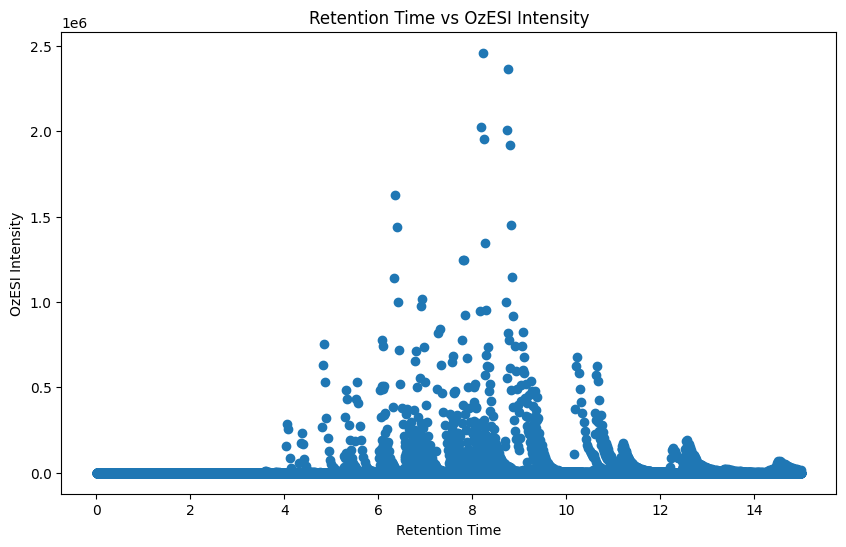

In [13]:
parser = OzESI_v2.RawDataParser(mrm_csv_path, oze_esi_csv_path)


# # Parse the data
# parsed_data = parser.parse_data(retention_time_range, new_columns, group_columns)
# Parse the data and get the DataFrame
# parsed_data = parser.parse_data(retention_time_range, new_columns, group_columns, Project_results, file_name_to_save)

# Parse the data
parsed_data = parser.parse_data(retention_time_range, new_columns, group_columns, project_results_directory, file_name_to_save, mode)

# Save raw data
save_status = parser.save_raw_data(project_results_directory, file_name_to_save, mode)

# Plot the full spectrum
parser.plot_full_spectrum(raw_data_csv)

# Plot the full spectrum

# Plot Full Spectrum to see if data is good

In [14]:
# # # Path to the output CSV file
# # output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser.csv"

# # Plot the full spectrum from the CSV file
# parser.plot_full_spectrum(output_csv)
# parser

In [15]:
# Print the parsed data
print(parsed_data)



RawDataParser complete, output saved to Projects/AMP/results/fame_mix/csv_data/AMP_RawDataParser_ON.csv


In [16]:
# import pandas as pd
# import re
# import matplotlib.pyplot as plt
# import os
# from scipy.signal import find_peaks, peak_widths


# # Function to create a folder if it doesn't exist
# def create_folder(directory):
#     if not os.path.exists(directory):
#         os.makedirs(directory)
#         print(f"Directory created at {directory}")
#     else:
#         print(f"Directory already exists at {directory}")

# class RawDataParser:
#     def __init__(self, mrm_csv_path, oze_esi_csv_path):
#         self.df_MRM = pd.read_csv(mrm_csv_path)
#         self.df_OzESI = pd.read_csv(oze_esi_csv_path)

#     def create_match_group(self, df):
#         df['Match_Group'] = df.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()
#         return df

#     def filter_retention_time(self, df, retention_time_range):
#         df_filtered = df[(df['Retention_Time'] >= retention_time_range[0]) & (df['Retention_Time'] <= retention_time_range[1])]
#         return df_filtered

#     def is_within_tolerance(self, ion1, ion2, tolerance=0.3):
#         return abs(ion1 - ion2) <= tolerance

#     def match_lipids(self, d1a, d1b):
#         if 'Match_Group' not in d1a.columns:
#             d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()

#         d1b['Match_Group'] = d1a['Match_Group']
#         d1b['Lipid'] = None

#         for group in d1a['Match_Group'].unique():
#             group_row = d1a[d1a['Match_Group'] == group].iloc[0]

#             for _, mrm_row in self.df_MRM.iterrows():
#                 if self.is_within_tolerance(group_row['Parent_Ion'], mrm_row['Parent_Ion']) and self.is_within_tolerance(group_row['Product_Ion'], mrm_row['Product_Ion']):
#                     d1b.loc[d1b['Match_Group'] == group, 'Lipid'] = mrm_row['Lipid']
#                     break

#         return d1b

#     def extract_details_from_sample_id(self, df, column_name='Sample_ID', new_columns=None):
#         if new_columns is None or not isinstance(new_columns, dict):
#             raise ValueError("new_columns must be a dictionary with column names as keys and list of strings as values")

#         for col, values in new_columns.items():
#             pattern = f"(?P<{col}>{'|'.join(values)})"
#             df_extracted = df[column_name].str.extract(pattern)
#             df = pd.concat([df, df_extracted[[col]]], axis=1)

#         return df

#     def extract_fac_values(self, df):
#         def extract_fac(lipid):
#             if pd.isna(lipid):
#                 return []
#             return re.findall(r'\d+:\d+', lipid)

#         df['FAC'] = df['Lipid'].apply(extract_fac)
#         return df

#     def group(self, df, group_columns=None):
#         if group_columns is None:
#             group_columns = ['Lipid', 'Sample_ID', 'Biology', 'Genotype', 'Mouse', 'Cage']

#         if not isinstance(group_columns, list):
#             raise ValueError("group_columns must be a list of column names")

#         invalid_columns = set(group_columns) - set(df.columns)
#         if invalid_columns:
#             raise ValueError(f"The following columns are not present in the DataFrame: {', '.join(invalid_columns)}")

#         df['Group_Sample'] = df.groupby(group_columns).ngroup()
#         return df

#     def parse_data(self, retention_time_range, new_columns, group_columns=None, project_results=None, file_name_to_save=None):
#         self.df_MRM = self.create_match_group(self.df_MRM)

#         d1 = self.df_OzESI.iloc[:, 1:]
#         d1a = self.filter_retention_time(d1, retention_time_range)
#         d1a = self.create_match_group(d1a)

#         d1b = d1a.copy()
#         d1b = self.match_lipids(d1a, d1b)

#         d1c = d1b.copy()
#         d1c = self.extract_details_from_sample_id(d1c, new_columns=new_columns)
#         d1c = self.extract_fac_values(d1c)

#         d1d = d1c.copy()
#         d1d = self.group(d1d, group_columns)

#         csv_data_folder = f'{project_results}csv_data/'
#         create_folder(csv_data_folder)

#         output_csv = f"{csv_data_folder}{file_name_to_save}_RawDataParser.csv"
#         d1d.to_csv(output_csv, index=False)
#         return f"RawDataParser complete, output saved to {output_csv}"

#     def save_raw_data(self, project_results, file_name_to_save):
#         csv_data_folder = f'{project_results}csv_data/'
#         create_folder(csv_data_folder)
#         self.df_MRM.to_csv(f'{csv_data_folder}{file_name_to_save}_df_MRM.csv', index=False)
#         self.df_OzESI.to_csv(f'{csv_data_folder}{file_name_to_save}_df_OzESI.csv', index=False)
#         return f"df_MRM and df_OzESI saved to {csv_data_folder}"

#     def plot_full_spectrum(self, csv_file_path):
#         # Read the CSV file into a DataFrame
#         df = pd.read_csv(csv_file_path)
        
#         # Plot the data
#         plt.figure(figsize=(10, 6))
#         plt.scatter(df['Retention_Time'], df['OzESI_Intensity'])
#         plt.xlabel('Retention Time')
#         plt.ylabel('OzESI Intensity')
#         plt.title('Retention Time vs OzESI Intensity')
#         plt.show()

# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks, peak_widths
# import os

# # Function to create a folder if it doesn't exist
# def create_folder(directory):
#     if not os.path.exists(directory):
#         os.makedirs(directory)
#         print(f"Directory created at {directory}")
#     else:
#         print(f"Directory already exists at {directory}")


# # Function to create a folder if it doesn't exist
# def create_folder(directory):
#     if not os.path.exists(directory):
#         os.makedirs(directory)
#         print(f"Directory created at {directory}")
#     else:
#         print(f"Directory already exists at {directory}")

# ### old code peak width seems off
# # class PeakAnalysis:
# #     def __init__(self, raw_data_csv):
# #         self.data = pd.read_csv(raw_data_csv)

# #     def find_lipid_peaks(self, use_match_group=True, height=None, width=None, rel_height=0.5, project_results=None, file_name_to_save=None, user_input="OFF"):
# #         if user_input not in ["ON", "OFF"]:
# #             raise ValueError("user_input must be 'ON' or 'OFF'")
        
# #         filter_col = 'Match_Group' if use_match_group else 'Group_Sample'
# #         unique_groups = self.data[filter_col].unique()
# #         peak_data = []

# #         for group in unique_groups:
# #             group_data = self.data[self.data[filter_col] == group]
# #             peaks, properties = find_peaks(group_data['OzESI_Intensity'], height=height, width=width)
# #             results_half = peak_widths(group_data['OzESI_Intensity'], peaks, rel_height=rel_height)

# #             for i, peak in enumerate(peaks):
# #                 metadata = group_data.iloc[peak][['Parent_Ion', 'Product_Ion', 'FAC', 'Group_Sample', 'Match_Group', 'Biology', 'Genotype', 'Cage', 'Mouse', 'Lipid']]
# #                 peak_data.append({
# #                     'Lipid': metadata['Lipid'],
# #                     'Retention_Time': group_data.iloc[peak]['Retention_Time'],
# #                     'OzESI_Intensity': group_data.iloc[peak]['OzESI_Intensity'],
# #                     'Match_Group': metadata['Match_Group'],
# #                     'Group_Sample': metadata['Group_Sample'],
# #                     'Sample_ID': group_data.iloc[peak]['Sample_ID'],
# #                     'Parent_Ion': metadata['Parent_Ion'],
# #                     'Product_Ion': metadata['Product_Ion'],
# #                     'FAC': metadata['FAC'],
# #                     'Biology': metadata['Biology'],
# #                     'Genotype': metadata['Genotype'],
# #                     'Cage': metadata['Cage'],
# #                     'Mouse': metadata['Mouse'],
# #                     'Peak_Height': properties['peak_heights'][i],
# #                     'FWHM': results_half[1][i],
# #                     'Peak_Width': results_half[0][i],
# #                     'Peak_Area': properties['peak_heights'][i] * results_half[0][i]
# #                 })

# #         peaks_df = pd.DataFrame(peak_data)

# #         csv_data_folder = f'{project_results}csv_data/'
# #         create_folder(csv_data_folder)

# #         output_csv = f"{csv_data_folder}{file_name_to_save}_PeakAnalysis_{user_input}.csv"
# #         peaks_df.to_csv(output_csv, index=False)
# #         return peaks_df

# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.signal import find_peaks, peak_widths


# def create_folder(folder_path):
#     import os
#     if not os.path.exists(folder_path):
#         os.makedirs(folder_path)


# class PeakAnalysis:
#     def __init__(self, raw_data_csv):
#         self.data = pd.read_csv(raw_data_csv)

#     def find_lipid_peaks(self, use_match_group=True, height=None, width=None, rel_height=0.5, project_results=None, file_name_to_save=None, user_input="OFF"):
#         if user_input not in ["ON", "OFF"]:
#             raise ValueError("user_input must be 'ON' or 'OFF'")
        
#         filter_col = 'Match_Group' if use_match_group else 'Group_Sample'
#         unique_groups = self.data[filter_col].unique()
#         peak_data = []

#         for group in unique_groups:
#             group_data = self.data[self.data[filter_col] == group]
#             peaks, properties = find_peaks(group_data['OzESI_Intensity'], height=height, width=width)
#             results_half = peak_widths(group_data['OzESI_Intensity'], peaks, rel_height=rel_height)

#             # Calculate sampling interval
#             retention_times = group_data['Retention_Time'].values
#             if len(retention_times) > 1:
#                 sampling_interval = retention_times[1] - retention_times[0]
#             else:
#                 sampling_interval = 1  # Fallback value in case there's only one retention time

#             print(f"Sampling Interval: {sampling_interval}")

#             for i, peak in enumerate(peaks):
#                 metadata = group_data.iloc[peak][['Parent_Ion', 'Product_Ion', 'FAC', 'Group_Sample', 'Match_Group', 'Biology', 'Genotype', 'Cage', 'Mouse', 'Lipid']]
#                 left_ip = results_half[2][i]
#                 right_ip = results_half[3][i]
#                 left_time = group_data['Retention_Time'].iloc[int(left_ip)]
#                 right_time = group_data['Retention_Time'].iloc[int(right_ip)]
#                 width_in_time = right_time - left_time

#                 fwhm = results_half[0][i] * sampling_interval

#                 print(f"Group_Sample: {metadata['Group_Sample']} - Peak {i}: Start Time = {left_time}, End Time = {right_time}, Width = {width_in_time}, FWHM = {fwhm}")

#                 peak_data.append({
#                     'Lipid': metadata['Lipid'],
#                     'Retention_Time': group_data.iloc[peak]['Retention_Time'],
#                     'OzESI_Intensity': group_data.iloc[peak]['OzESI_Intensity'],
#                     'Match_Group': metadata['Match_Group'],
#                     'Group_Sample': metadata['Group_Sample'],
#                     'Sample_ID': group_data.iloc[peak]['Sample_ID'],
#                     'Parent_Ion': metadata['Parent_Ion'],
#                     'Product_Ion': metadata['Product_Ion'],
#                     'FAC': metadata['FAC'],
#                     'Biology': metadata['Biology'],
#                     'Genotype': metadata['Genotype'],
#                     'Cage': metadata['Cage'],
#                     'Mouse': metadata['Mouse'],
#                     'Peak_Height': properties['peak_heights'][i],
#                     'FWHM': fwhm,
#                     'Peak_Width': width_in_time,
#                     'Peak_Area': properties['peak_heights'][i] * width_in_time
#                 })

#         peaks_df = pd.DataFrame(peak_data)

#         csv_data_folder = f'{project_results}csv_data/'
#         create_folder(csv_data_folder)

#         output_csv = f"{csv_data_folder}{file_name_to_save}_PeakAnalysis_{user_input}.csv"
#         peaks_df.to_csv(output_csv, index=False)
#         return peaks_df

# # Example usage
# # analysis = PeakAnalysis('path_to_your_raw_data.csv')
# # analysis.find_lipid_peaks(height=50000, project_results='./', file_name_to_save='results', user_input='ON')



# # Example usage
# # analysis = PeakAnalysis('path_to_your_raw_data.csv')
# # analysis.find_lipid_peaks(height=50000, project_results='./', file_name_to_save='results', user_input='ON')


# # Example usage
# # analysis = PeakAnalysis('path_to_your_raw_data.csv')
# # analysis.find_lipid_peaks(height=50000, project_results='./', file_name_to_save='results', user_input='ON')




# ### old seems to kinda be working but missing a few things like peak start n stop
#     # def plot_data_and_peaks(self, raw_data_csv, peak_analysis_csv, group_value, group_type='Match_Group', rel_height=0.5):
#     #     # Read the raw data CSV file into a DataFrame
#     #     raw_df = pd.read_csv(raw_data_csv)

#     #     # Read the peak analysis CSV file into a DataFrame
#     #     peak_df = pd.read_csv(peak_analysis_csv)

#     #     if group_type not in ['Match_Group', 'Group_Sample']:
#     #         raise ValueError("group_type must be 'Match_Group' or 'Group_Sample'")

#     #     # Filter the DataFrame based on the specified group value
#     #     filtered_raw_df = raw_df[raw_df[group_type] == group_value]
#     #     filtered_peak_df = peak_df[peak_df[group_type] == group_value]

#     #     if filtered_raw_df.empty:
#     #         print(f"No data found for group {group_value} ({group_type})")
#     #         return

#     #     # Calculate the sampling interval
#     #     retention_times = filtered_raw_df['Retention_Time'].values
#     #     sampling_interval = retention_times[1] - retention_times[0]

#     #     # Plot the full spectrum data
#     #     plt.figure(figsize=(10, 6))
#     #     plt.plot(filtered_raw_df['Retention_Time'], filtered_raw_df['OzESI_Intensity'], color='blue', label='Intensity vs. Retention Time')
#     #     if not filtered_raw_df.empty:
#     #         first_peak = filtered_raw_df.iloc[0]
#     #         title_info = f"{first_peak['Lipid']}, MG {first_peak['Match_Group']}, GS {first_peak['Group_Sample']}, {first_peak['Parent_Ion']}, {first_peak['FAC']}, {first_peak['Biology']}, {first_peak['Genotype']}, {first_peak['Cage']}, {first_peak['Mouse']}"
#     #         plt.title(title_info)
#     #     plt.xlabel('Retention Time')
#     #     plt.ylabel('OzESI Intensity')
#     #     plt.legend()
#     #     plt.grid(True)
#     #     plt.show()

#     #     # Plot the peak data
#     #     peaks, properties = find_peaks(filtered_raw_df['OzESI_Intensity'], height=50000)
#     #     results_half = peak_widths(filtered_raw_df['OzESI_Intensity'], peaks, rel_height=rel_height)

#     #     # Convert peak widths to retention time units
#     #     left_ips = results_half[2]
#     #     right_ips = results_half[3]
#     #     peak_widths_in_time = (right_ips - left_ips) * sampling_interval

#     #     plt.figure(figsize=(10, 6))
#     #     plt.plot(filtered_raw_df['Retention_Time'], filtered_raw_df['OzESI_Intensity'], color='gray', alpha=0.5, label='Full Data')
#     #     plt.scatter(filtered_raw_df.iloc[peaks]['Retention_Time'], filtered_raw_df.iloc[peaks]['OzESI_Intensity'], color='red', label='Peaks')
        
#     #     # Plot peak widths using the converted time units
#     #     for left_ip, right_ip, height in zip(left_ips, right_ips, results_half[1]):
#     #         plt.hlines(y=height, xmin=filtered_raw_df['Retention_Time'].iloc[int(left_ip)], xmax=filtered_raw_df['Retention_Time'].iloc[int(right_ip)], color='blue', linestyle='--', label='Peak Width')

#     #     plt.xlabel('Retention Time')
#     #     plt.ylabel('OzESI Intensity')
#     #     plt.legend()
#     #     plt.title(f"Peaks for Group {group_value} ({group_type})")
#     #     plt.grid(True)
#     #     plt.show()




#     def plot_data_and_peaks(self, raw_data_csv, peak_analysis_csv, group_value, group_type='Match_Group', rel_height=0.5):
#         # Read the raw data CSV file into a DataFrame
#         raw_df = pd.read_csv(raw_data_csv)

#         # Read the peak analysis CSV file into a DataFrame
#         peak_df = pd.read_csv(peak_analysis_csv)

#         if group_type not in ['Match_Group', 'Group_Sample']:
#             raise ValueError("group_type must be 'Match_Group' or 'Group_Sample'")

#         # Filter the DataFrame based on the specified group value
#         filtered_raw_df = raw_df[raw_df[group_type] == group_value]
#         filtered_peak_df = peak_df[peak_df[group_type] == group_value]

#         if filtered_raw_df.empty:
#             print(f"No data found for group {group_value} ({group_type})")
#             return

#         # Calculate the sampling interval
#         retention_times = filtered_raw_df['Retention_Time'].values
#         sampling_interval = retention_times[1] - retention_times[0]

#         # Plot the full spectrum data
#         plt.figure(figsize=(10, 6))
#         plt.plot(filtered_raw_df['Retention_Time'], filtered_raw_df['OzESI_Intensity'], color='blue', label='Intensity vs. Retention Time')
#         if not filtered_raw_df.empty:
#             first_peak = filtered_raw_df.iloc[0]
#             title_info = f"{first_peak['Lipid']}, MG {first_peak['Match_Group']}, GS {first_peak['Group_Sample']}, {first_peak['Parent_Ion']}, {first_peak['FAC']}, {first_peak['Biology']}, {first_peak['Genotype']}, {first_peak['Cage']}, {first_peak['Mouse']}"
#             plt.title(title_info)
#         plt.xlabel('Retention Time')
#         plt.ylabel('OzESI Intensity')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

#         # Plot the peak data
#         peaks, properties = find_peaks(filtered_raw_df['OzESI_Intensity'], height=50000)
#         results_half = peak_widths(filtered_raw_df['OzESI_Intensity'], peaks, rel_height=rel_height)

#         # Convert peak widths to retention time units
#         left_ips = results_half[2]
#         right_ips = results_half[3]
#         peak_widths_in_time = (right_ips - left_ips) * sampling_interval

#         plt.figure(figsize=(10, 6))
#         plt.plot(filtered_raw_df['Retention_Time'], filtered_raw_df['OzESI_Intensity'], color='gray', alpha=0.5, label='Full Data')
#         plt.scatter(filtered_raw_df.iloc[peaks]['Retention_Time'], filtered_raw_df.iloc[peaks]['OzESI_Intensity'], color='red', label='Peaks')
        
#         # Plot peak widths using the converted time units and vertical lines for start and stop times
#         for left_ip, right_ip, height in zip(left_ips, right_ips, results_half[1]):
#             left_time = filtered_raw_df['Retention_Time'].iloc[int(left_ip)]
#             right_time = filtered_raw_df['Retention_Time'].iloc[int(right_ip)]
#             plt.hlines(y=height, xmin=left_time, xmax=right_time, color='blue', linestyle='--', label='Peak Width')
#             plt.axvline(x=left_time, color='green', linestyle=':', label='Peak Start' if 'Peak Start' not in plt.gca().get_legend_handles_labels()[1] else "")
#             plt.axvline(x=right_time, color='purple', linestyle=':', label='Peak Stop' if 'Peak Stop' not in plt.gca().get_legend_handles_labels()[1] else "")

#         plt.xlabel('Retention Time')
#         plt.ylabel('OzESI Intensity')
#         plt.legend()
#         plt.title(f"Peaks for Group {group_value} ({group_type})")
#         plt.grid(True)
#         plt.show()

# import os

# # Create the directory if it doesn't exist
# def create_base_directory(base_plot_directory):
#     if not os.path.exists(base_plot_directory):
#         os.makedirs(base_plot_directory)
#         print(f"Directory created at {base_plot_directory}")
#     else:
#         print(f"Directory already exists at {base_plot_directory}")

# # Define a function to generate filenames based on lipid names
# def generate_filename(base_plot_directory, lipid_name):
#     safe_lipid_name = lipid_name.replace("/", "-").replace(" ", "_").replace(":", "-")  # Ensure filename is safe for filesystems
#     return f"{base_plot_directory}{safe_lipid_name}_OzON.png"

# #### for ozone compare

# # Function to save a DataFrame to an Excel file
# def save_for_ozone_compare(peaks_df, project_results_directory, save_df_name):
#     # Ensure the directory exists
#     if not os.path.exists(project_results_directory):
#         os.makedirs(project_results_directory)
#         print(f"Directory created at {project_results_directory}")
#     else:
#         print(f"Directory already exists at {project_results_directory}")
    
#     # Save the DataFrame to an Excel file
#     file_path = os.path.join(project_results_directory, save_df_name)
#     peaks_df.to_excel(file_path, index=False)
#     print(f'peaks_df saved to excel in results folder {file_path}')


# PeakAnalysis Class
### find peaks, RT and peak area 
### input df from RawDataParser and output is df

In [17]:

# Create an instance of PeakAnalysis
peak_analysis = OzESI_v2.PeakAnalysis(raw_data_csv, mode)

# Perform peak analysis
peaks_df = peak_analysis.find_lipid_peaks(use_match_group=True, height=50000, width=2, rel_height=0.5, project_results=Project_results, file_name_to_save=file_name_to_save, user_input=mode)


Sampling Interval: 0.0262166666666666
Sampling Interval: 0.026233333333333303
Group_Sample: -1 - Peak 0: Start Time = 7.526583333333334, End Time = 7.631516666666667, Width = 0.10493333333333332, FWHM = 0.08997482079019525
Sampling Interval: 0.026233333333333296
Group_Sample: -1 - Peak 0: Start Time = 6.634216666666667, End Time = 6.73915, Width = 0.10493333333333332, FWHM = 0.09153619244746856
Group_Sample: -1 - Peak 1: Start Time = 7.578600000000001, End Time = 7.6573, Width = 0.07869999999999955, FWHM = 0.0976283883750349
Sampling Interval: 0.0262166666666667
Group_Sample: -1 - Peak 0: Start Time = 6.633766666666667, End Time = 6.738700000000001, Width = 0.10493333333333332, FWHM = 0.0939969138572171
Group_Sample: -1 - Peak 1: Start Time = 7.57815, End Time = 7.683083333333333, Width = 0.10493333333333332, FWHM = 0.0996088517830315
Sampling Interval: 0.026216666666666704
Group_Sample: -1 - Peak 0: Start Time = 6.738250000000001, End Time = 6.843183333333334, Width = 0.10493333333333

In [18]:
peaks_df

############### WRITE A FUNCTION TO EASILY SCAN FOR SPECIFIC LIPIDS AN FIND THEIR MATCH GROUP OR GORUP SAMPLE
########## DOUBLE CHECK AREA CALCULATION

,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area
0,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...",7.579050,64931.144531,1,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,269.1,183.0,"['22:6', '12:1', '13:1', '14:1', '15:1', '16:1...",NaN,NaN,NaN,NaN,64931.144531,0.089975,0.104933,6813.441433
1,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",6.686683,64325.605469,2,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1,183.0,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,64325.605469,0.091536,0.104933,6749.900201
2,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",7.631067,91986.468750,2,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1,183.0,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,91986.468750,0.097628,0.078700,7239.335091
3,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",6.686233,70811.421875,3,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.3,183.0,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,70811.421875,0.093997,0.104933,7430.478535
4,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",7.630617,105181.585938,3,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.3,183.0,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,105181.585938,0.099609,0.104933,11037.054418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,20:1,10.655467,625269.312500,43,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,477.4,183.0,['20:1'],NaN,NaN,NaN,NaN,625269.312500,0.145964,0.157400,98417.389788
79,20:0 / 21:1n-2 / 22:1n-3,12.281450,147127.203125,44,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,479.4,183.0,"['20:0', '21:1', '22:1']",NaN,NaN,NaN,NaN,147127.203125,0.226471,0.236100,34736.732658
80,22:6,7.584817,314451.750000,46,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,495.4,183.0,['22:6'],NaN,NaN,NaN,NaN,314451.750000,0.092633,0.078700,24747.352725
81,22:2,11.204517,164623.828125,47,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,503.4,183.0,['22:2'],NaN,NaN,NaN,NaN,164623.828125,0.162672,0.157383,25909.046816


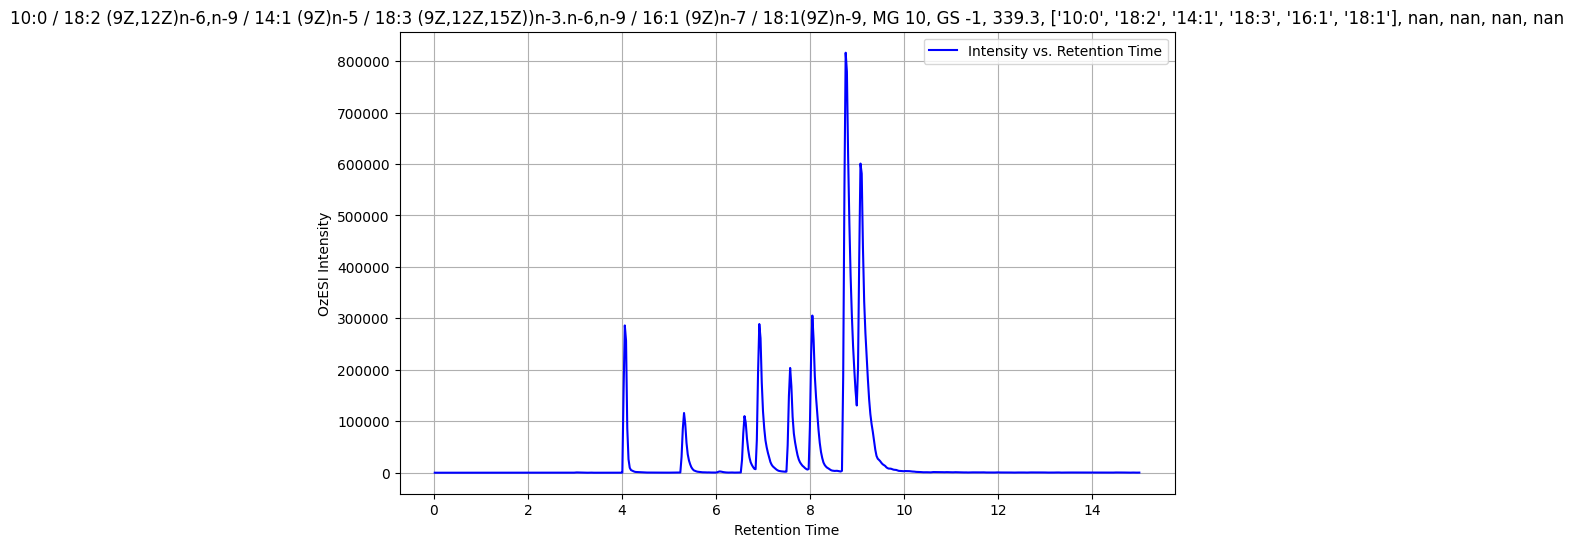

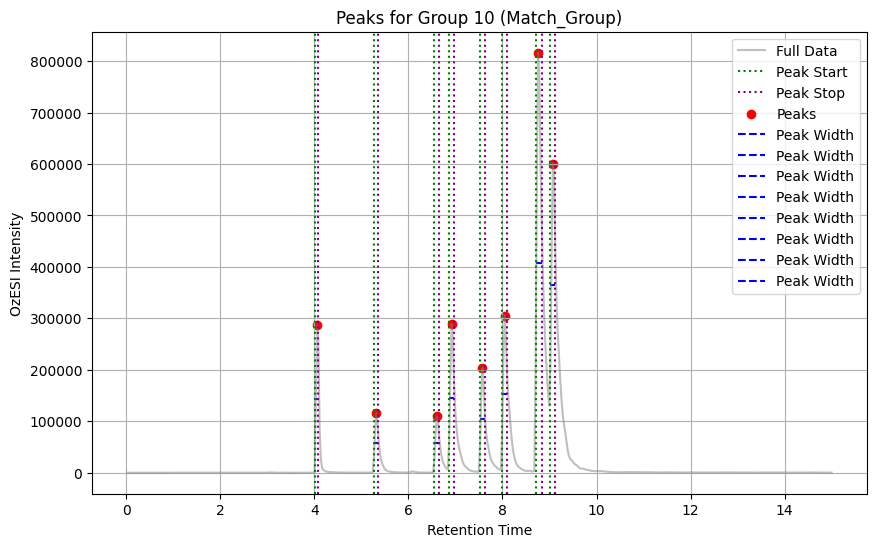

In [19]:

# Plot data and peaks for a specific group
peak_analysis.plot_data_and_peaks(raw_data_csv, peak_analysis_csv,group_type='Match_Group', group_value=10, height=50000, width=2, rel_height=0.5)

In [19]:
peaks_df

,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area
0,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,0.812617,1289.700073,0,16,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1,183.0,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",cereb,5xFAD,FAD257,m2,1289.700073,0.159854,0.155050,199.967996
1,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,1.058100,1431.520142,0,16,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1,183.0,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",cereb,5xFAD,FAD257,m2,1431.520142,0.067154,0.064600,92.476201
2,12:1n-11 / 13:1n-12 / 14:1n-13 / 15:1n-14 / 16...,9.792233,13146.441406,0,16,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,227.1,183.0,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",cereb,5xFAD,FAD257,m2,13146.441406,0.224504,0.219650,2887.615855
3,12:1n-10 / 13:1n-11 / 14:1n-12 / 15:1n-13 / 16...,1.135417,1412.760132,4,12,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,241.1,183.0,"['12:1', '13:1', '14:1', '15:1', '16:1', '17:1...",cereb,5xFAD,FAD257,m2,1412.760132,0.065679,0.064600,91.264305
4,4:0 / 12:1n-9 / 13:1n-10 / 14:1n-11 / 15:1n-12...,0.670083,1241.380127,8,200,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,255.2,183.0,"['4:0', '12:1', '13:1', '14:1', '15:1', '16:1'...",cereb,5xFAD,FAD257,m2,1241.380127,0.070220,0.077517,96.227650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,22:6,6.358750,3674.260254,191,163,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,495.4,183.0,['22:6'],dienc,5xFAD,FAD257,m2,3674.260254,0.074613,0.064600,237.357212
972,22:6,6.630083,1010.460083,191,163,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,495.4,183.0,['22:6'],dienc,5xFAD,FAD257,m2,1010.460083,0.067909,0.064600,65.275721
973,22:6,6.888483,1026.100098,191,163,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,495.4,183.0,['22:6'],dienc,5xFAD,FAD257,m2,1026.100098,0.080132,0.077533,79.556961
974,22:6,7.095200,1100.280029,191,163,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,495.4,183.0,['22:6'],dienc,5xFAD,FAD257,m2,1100.280029,0.079718,0.077517,85.290040


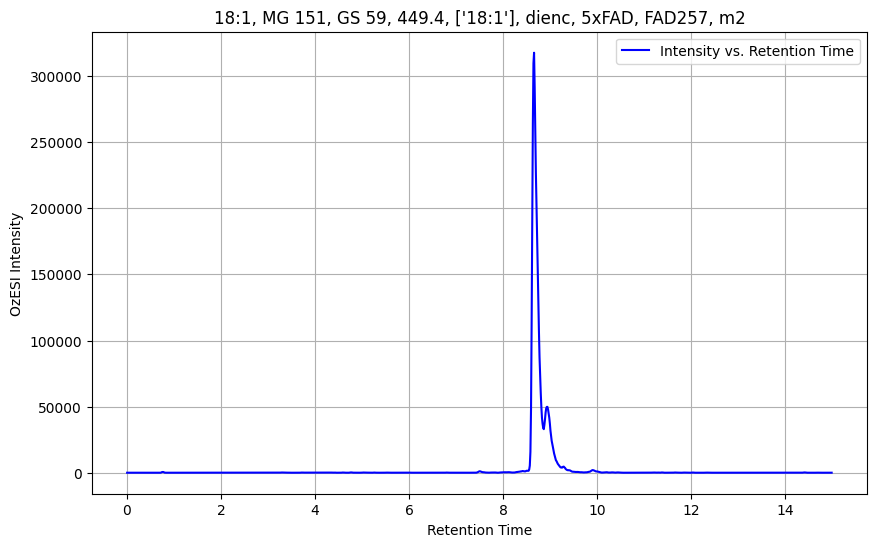

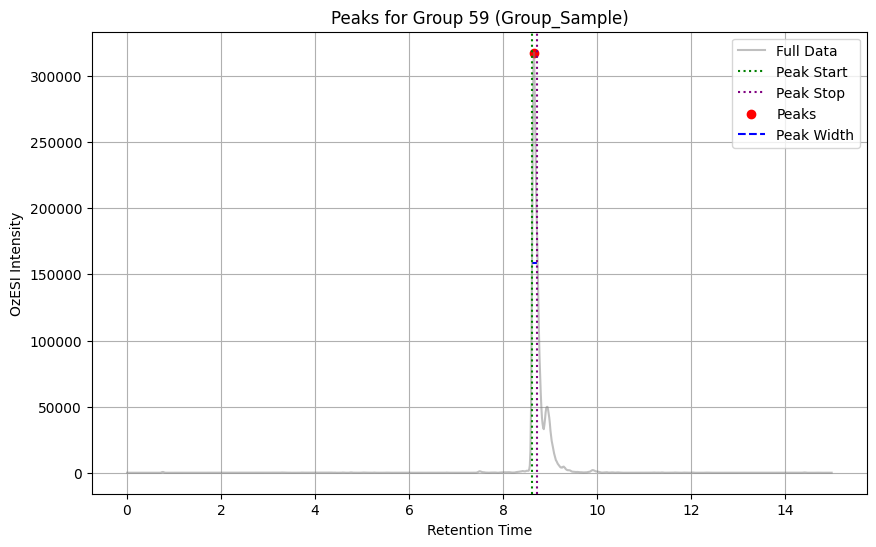

In [17]:
# # # Plot data and peaks from the PeakAnalysis CSV file
# # peak_analysis.plot_data_and_peaks(peak_analysis_csv, group_value=12, group_type='Group_Sample')
# # Plot data and peaks from the PeakAnalysis CSV file

# #### PEAK WIDTH SEEMS WRONG
# peak_analysis.plot_data_and_peaks(raw_data_csv, peak_analysis_csv, group_value=59, group_type='Group_Sample')


# Save output of PeakAnalysis df to excel to be used for Ozone Compare Later

In [18]:
# # Define the project results directory and the filename
# project_results_directory = 'Projects/AMP/results/test3/csv_data/'
# save_df_name = 'test3_ON.csv'

# # Call the function to save the DataFrame
# OzESI_v2.save_for_ozone_compare(peaks_df, project_results_directory, save_df_name)

Directory already exists at Projects/AMP/results/test3/csv_data/


AttributeError: 'DataFrame' object has no attribute 'csv'

In [19]:
# import pandas as pd
# import os

# # Function to read a CSV file, process it, and save the DataFrame to a new CSV file
# def save_for_ozone_compare(peak_analysis_csv, project_results_directory, save_df_name):
#     # Ensure the directory exists
#     if not os.path.exists(project_results_directory):
#         os.makedirs(project_results_directory)
#         print(f"Directory created at {project_results_directory}")
#     else:
#         print(f"Directory already exists at {project_results_directory}")
    
#     # Read the peak analysis CSV file into a DataFrame
#     peaks_df = pd.read_csv(peak_analysis_csv)
    
#     # Save the DataFrame to a CSV file
#     file_path = os.path.join(project_results_directory, save_df_name)
#     peaks_df.to_csv(file_path, index=False)
#     print(f'peaks_df saved to CSV in results folder {file_path}')

# # Paths to the CSV files
# csv_data_folder = './Projects/AMP/results/test3/csv_data/'  # Update this to your actual path
# peak_analysis_csv = f"{csv_data_folder}{file_name_to_save}_PeakAnalysis.csv"

# # Path to the output directory and file name
# project_results_directory = './Projects/AMP/results/test3/csv_data/'  # Update this to your actual path
# save_df_name = 'test3_ON.csv'  # Specify the desired name for the output file

# # Call the function to read, process, and save the DataFrame
# save_for_ozone_compare(peak_analysis_csv, project_results_directory, save_df_name)


Directory already exists at ./Projects/AMP/results/test3/csv_data/
peaks_df saved to CSV in results folder ./Projects/AMP/results/test3/csv_data/test3_ON.csv


# OzoneCompare Class
### Input OzOFF and OzON df
### Match FAC and RT in OzON to those in OzOFF

In [19]:
# main_script.py

# Import the OzoneCompare class
from OzESI_compare_v2 import OzoneCompare

# Define the directory and file names
directory = './Projects/AMP/results/test3/csv_data/'
file_name_on = 'AMP_PeakAnalysis_ON.csv'
file_name_off = 'AMP_PeakAnalysis_OFF.csv'

# Initialize OzoneCompare with the directory and file names
ozone_compare = OzoneCompare(directory, file_name_on, file_name_off)

# Match the dataframes
matched_df = ozone_compare.match_dataframes()

# Print matched data for a specific match group
match_group = 1  # Replace with the actual match group value you want to check
ozone_compare.print_fac_and_off_match(matched_df, match_group)

# Filter the matched dataframe to exclude rows containing ':0' in FAC_OFF
filtered_df = ozone_compare.filter_contains_colon_zero(matched_df)

# Print the filtered dataframe
print(filtered_df)


No entries found for Match Group 1.
                                                  Lipid  Retention_Time  \
1     8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...        3.601983   
2     8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...        3.601983   
3     8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...        3.601983   
4     8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...        3.601983   
5     8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...        3.601983   
...                                                 ...             ...   
2143              22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5        5.869233   
2144              22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5        5.869233   
2145              22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5        5.869233   
2146              22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5        5.869233   
2147              22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5        5.869233   

      OzESI_Intensity Match_Group Group_Sample  \
1       17577

In [20]:
filtered_df

,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area,FAC_OFF,Retention_Time_OFF
1,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,175778.109375,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"['8:0', '12:1', '13:1', '14:1', '15:1', '16:1'...",cereb,5xFAD,FAD257,m2,175778.109375,87909.784689,4.665065,820016.306490,12:1,3.601983
2,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,175778.109375,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"['8:0', '12:1', '13:1', '14:1', '15:1', '16:1'...",cereb,5xFAD,FAD257,m2,175778.109375,87909.784689,4.665065,820016.306490,13:1,3.601983
3,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,175778.109375,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"['8:0', '12:1', '13:1', '14:1', '15:1', '16:1'...",cereb,5xFAD,FAD257,m2,175778.109375,87909.784689,4.665065,820016.306490,14:1,3.601983
4,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,175778.109375,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"['8:0', '12:1', '13:1', '14:1', '15:1', '16:1'...",cereb,5xFAD,FAD257,m2,175778.109375,87909.784689,4.665065,820016.306490,15:1,3.601983
5,8:0 / 12:1n-5 / 13:1n-6 / 14:1n-7 / 15:1n-8 / ...,3.601983,175778.109375,28,208,11192023_5xFAD-m2-cereb-FAD257_AMP_2x_0.05uMd2...,311.3,183.0,"['8:0', '12:1', '13:1', '14:1', '15:1', '16:1'...",cereb,5xFAD,FAD257,m2,175778.109375,87909.784689,4.665065,820016.306490,16:1,3.601983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,68034.601562,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183.0,"['22:6', '20:5']",dienc,5xFAD,FAD257,m2,68034.601562,34038.080782,5.831340,396732.893145,20:5,5.882133
2144,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,68034.601562,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183.0,"['22:6', '20:5']",dienc,5xFAD,FAD257,m2,68034.601562,34038.080782,5.831340,396732.893145,22:6,5.882133
2145,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,68034.601562,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183.0,"['22:6', '20:5']",dienc,5xFAD,FAD257,m2,68034.601562,34038.080782,5.831340,396732.893145,20:5,5.882133
2146,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3)/20:5",5.869233,68034.601562,163,167,11192023_5xFAD-m2-dienc-FAD257_AMP_2x_0.05uMd2...,469.4,183.0,"['22:6', '20:5']",dienc,5xFAD,FAD257,m2,68034.601562,34038.080782,5.831340,396732.893145,22:6,5.869233


Directory already exists at Projects/AMP/results/test3/plots/on/


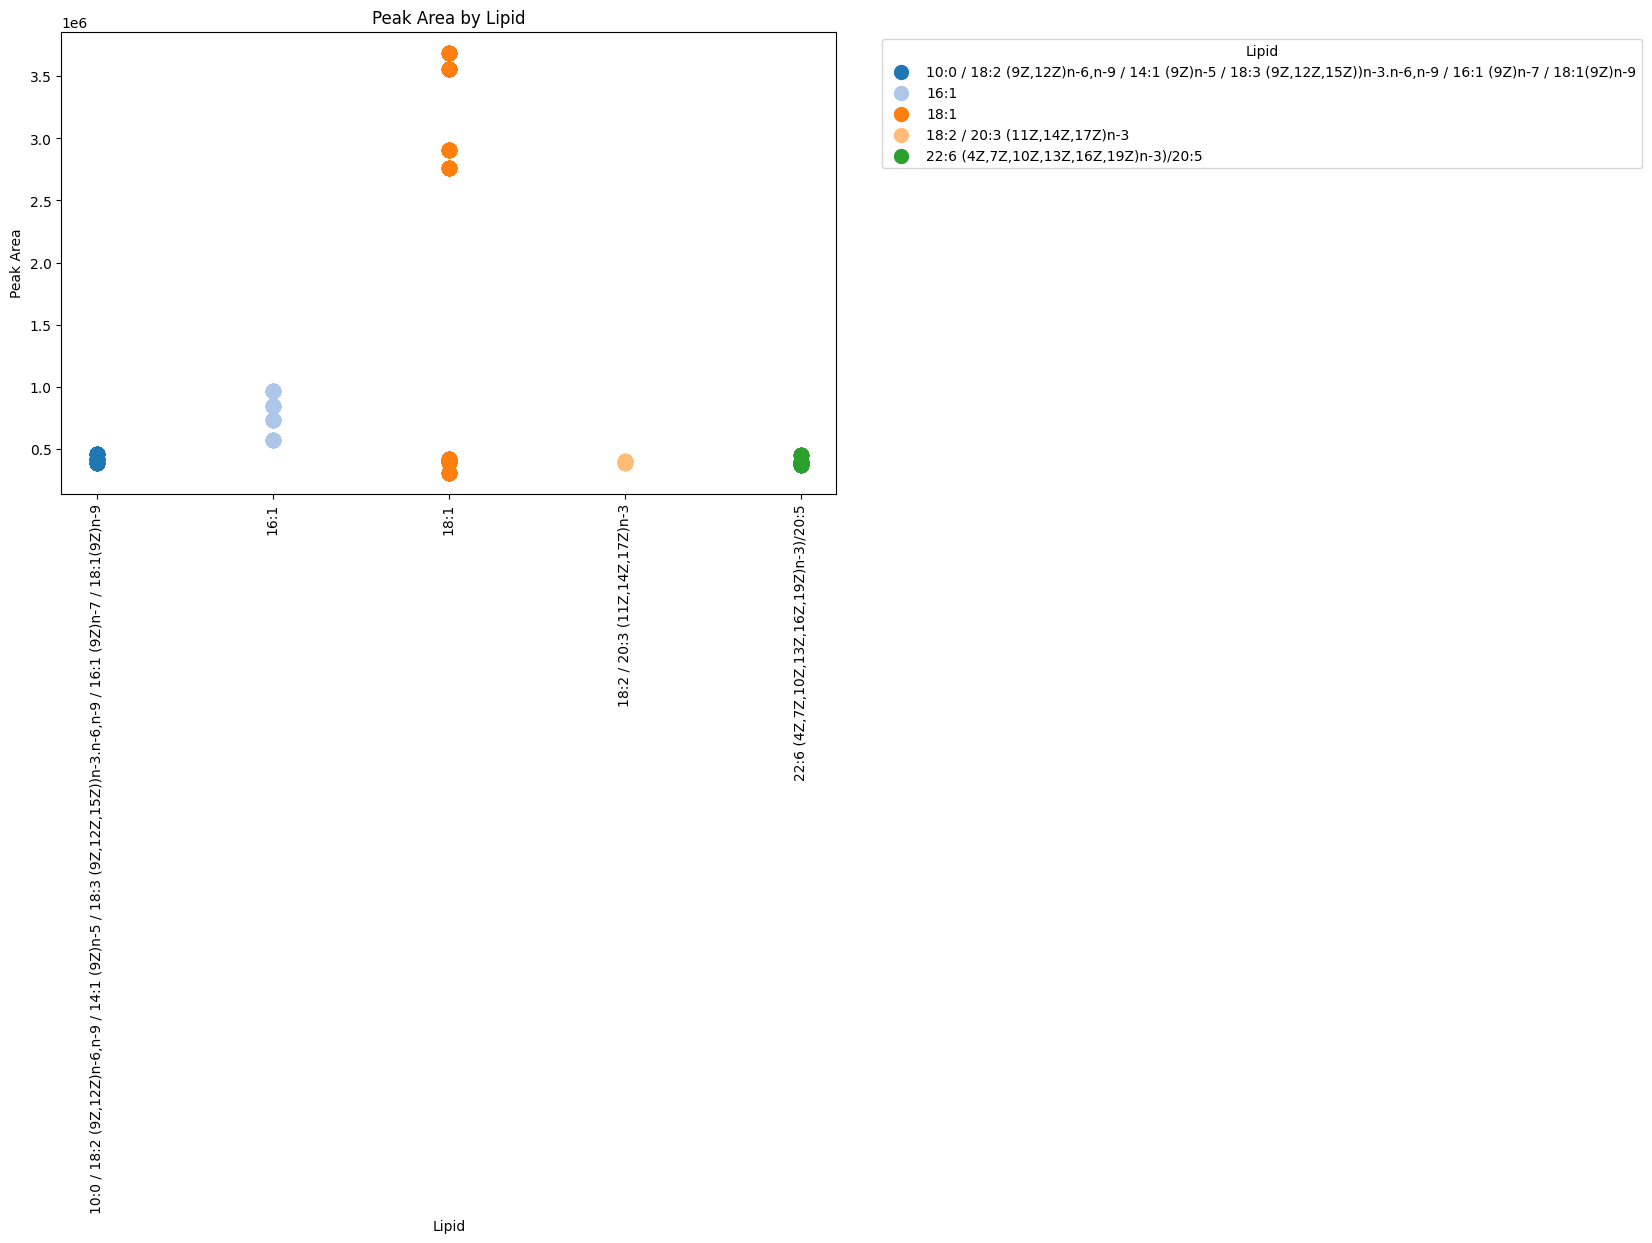

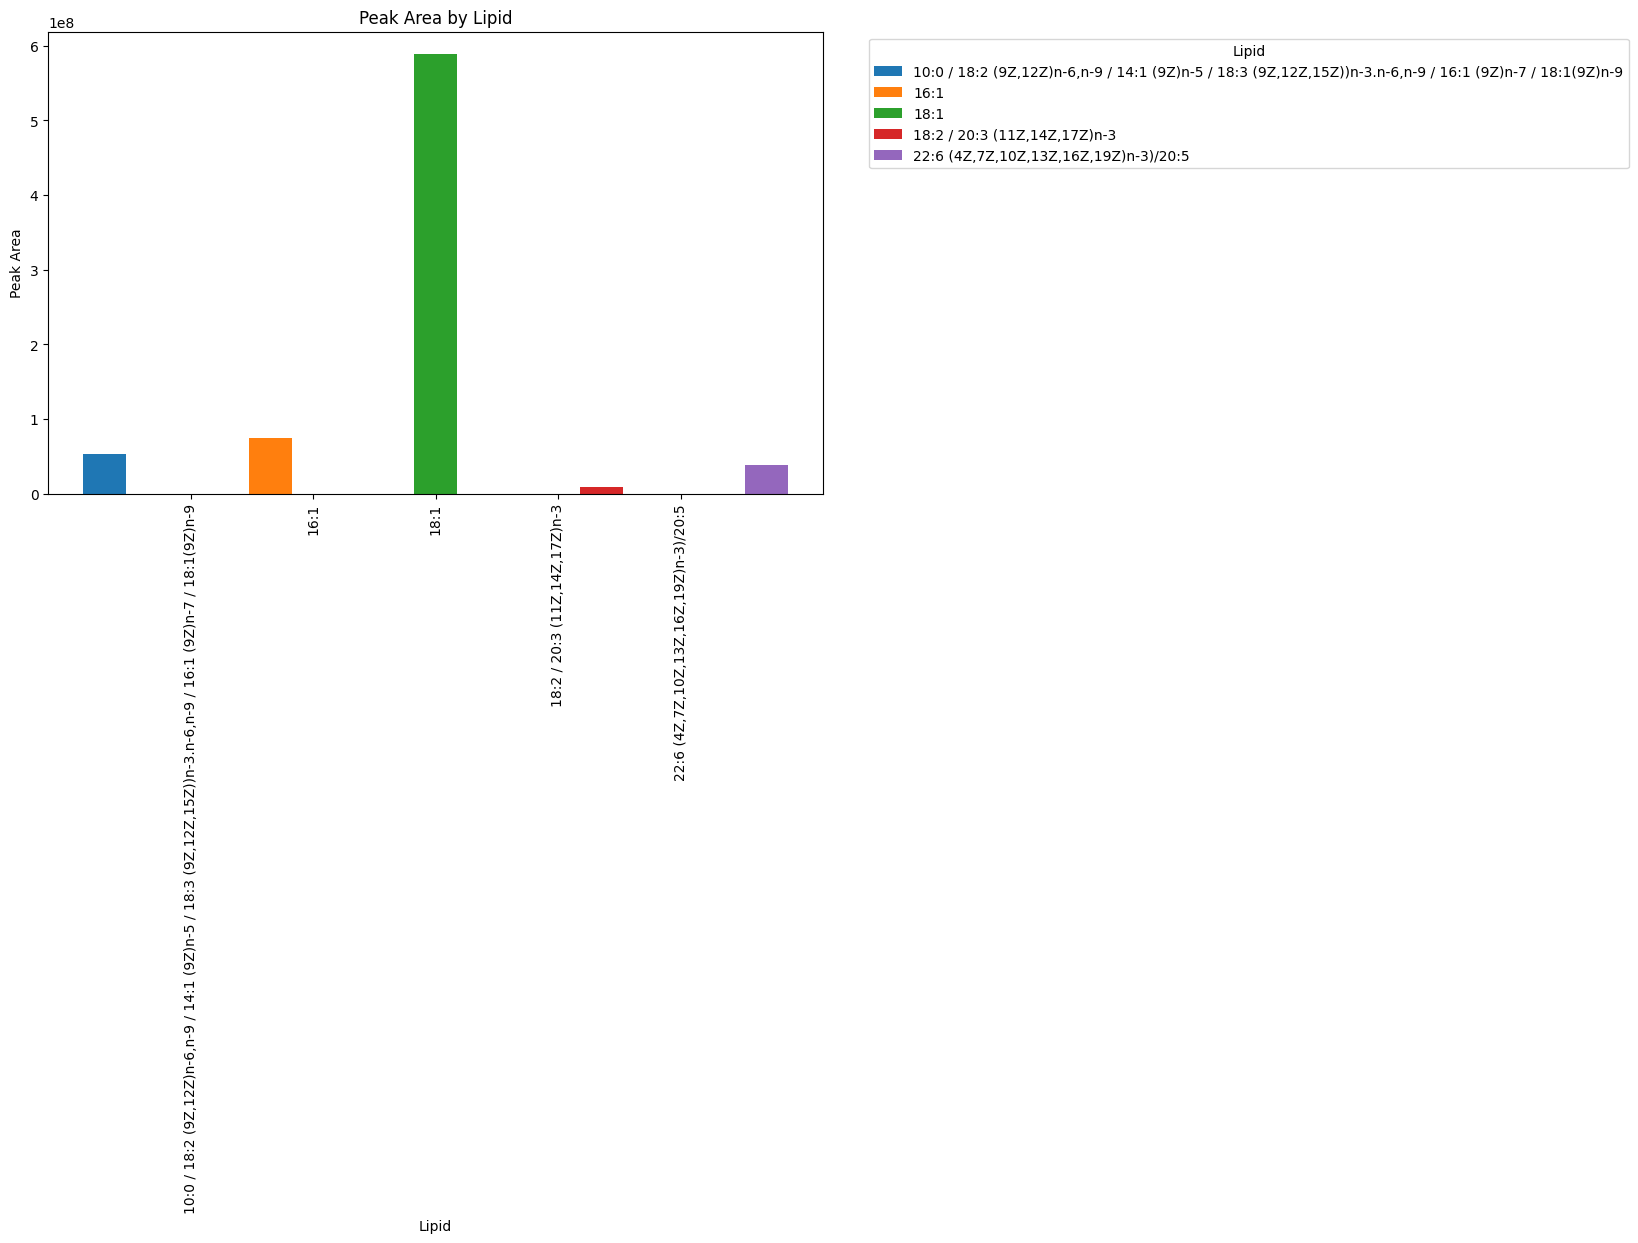

In [47]:
import OzESI_plot

# # Define the directory where the plots should be saved
# plots_directory = 'Projects/AMP/results/fame_mix/plots/on/'

# Create an instance of the Plot class with the specified directory
plot_instance = OzESI_plot.Plot(dataframe=filtered_df, plot_directory=plots_directory)

# Call the scatter method to plot data
plot_instance.scatter()

# Call the plot_bar method to display bar charts
plot_instance.plot_bar()

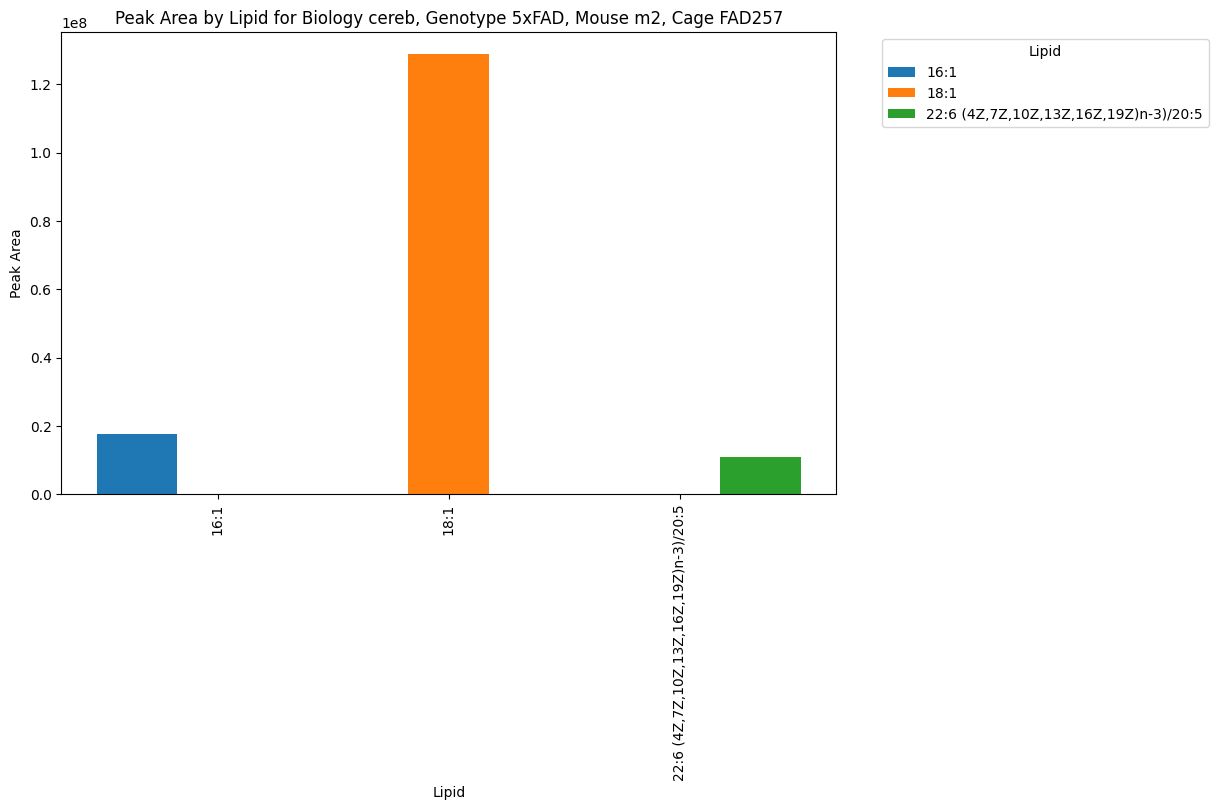

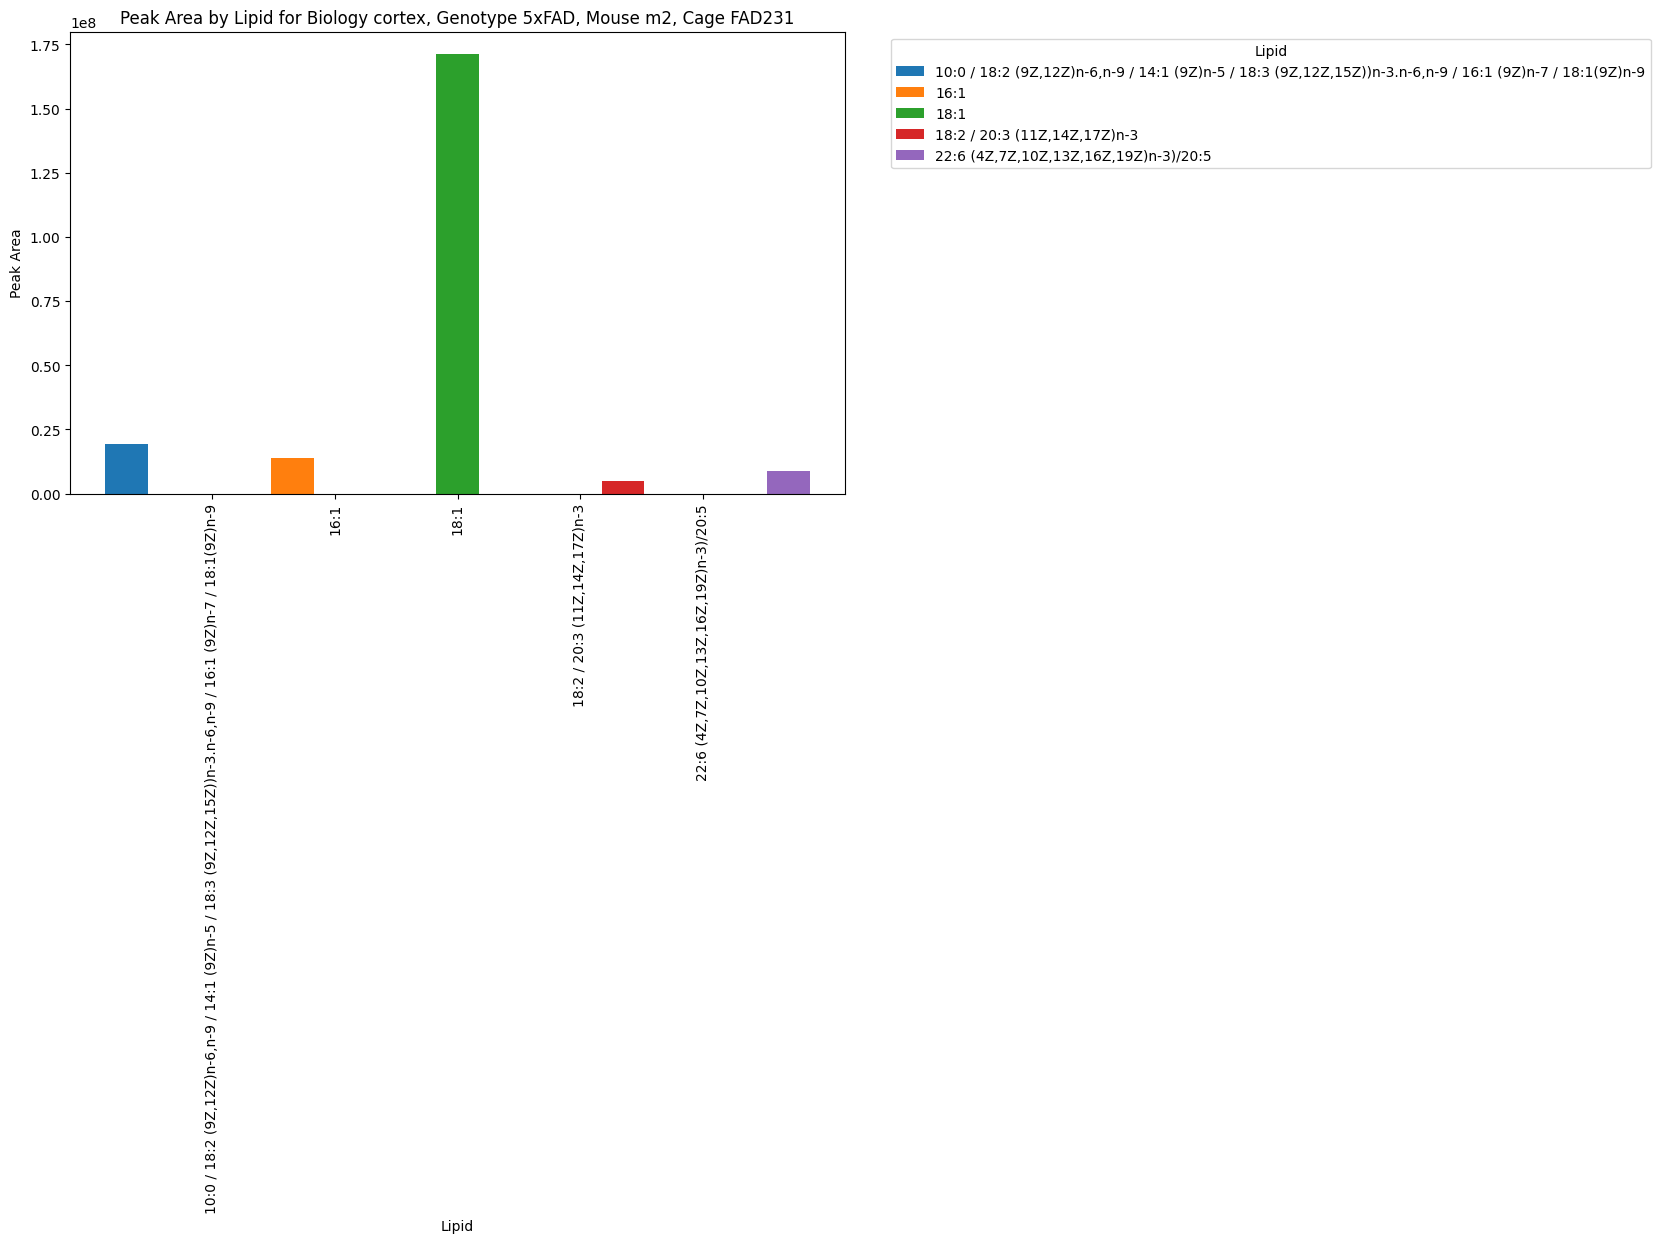

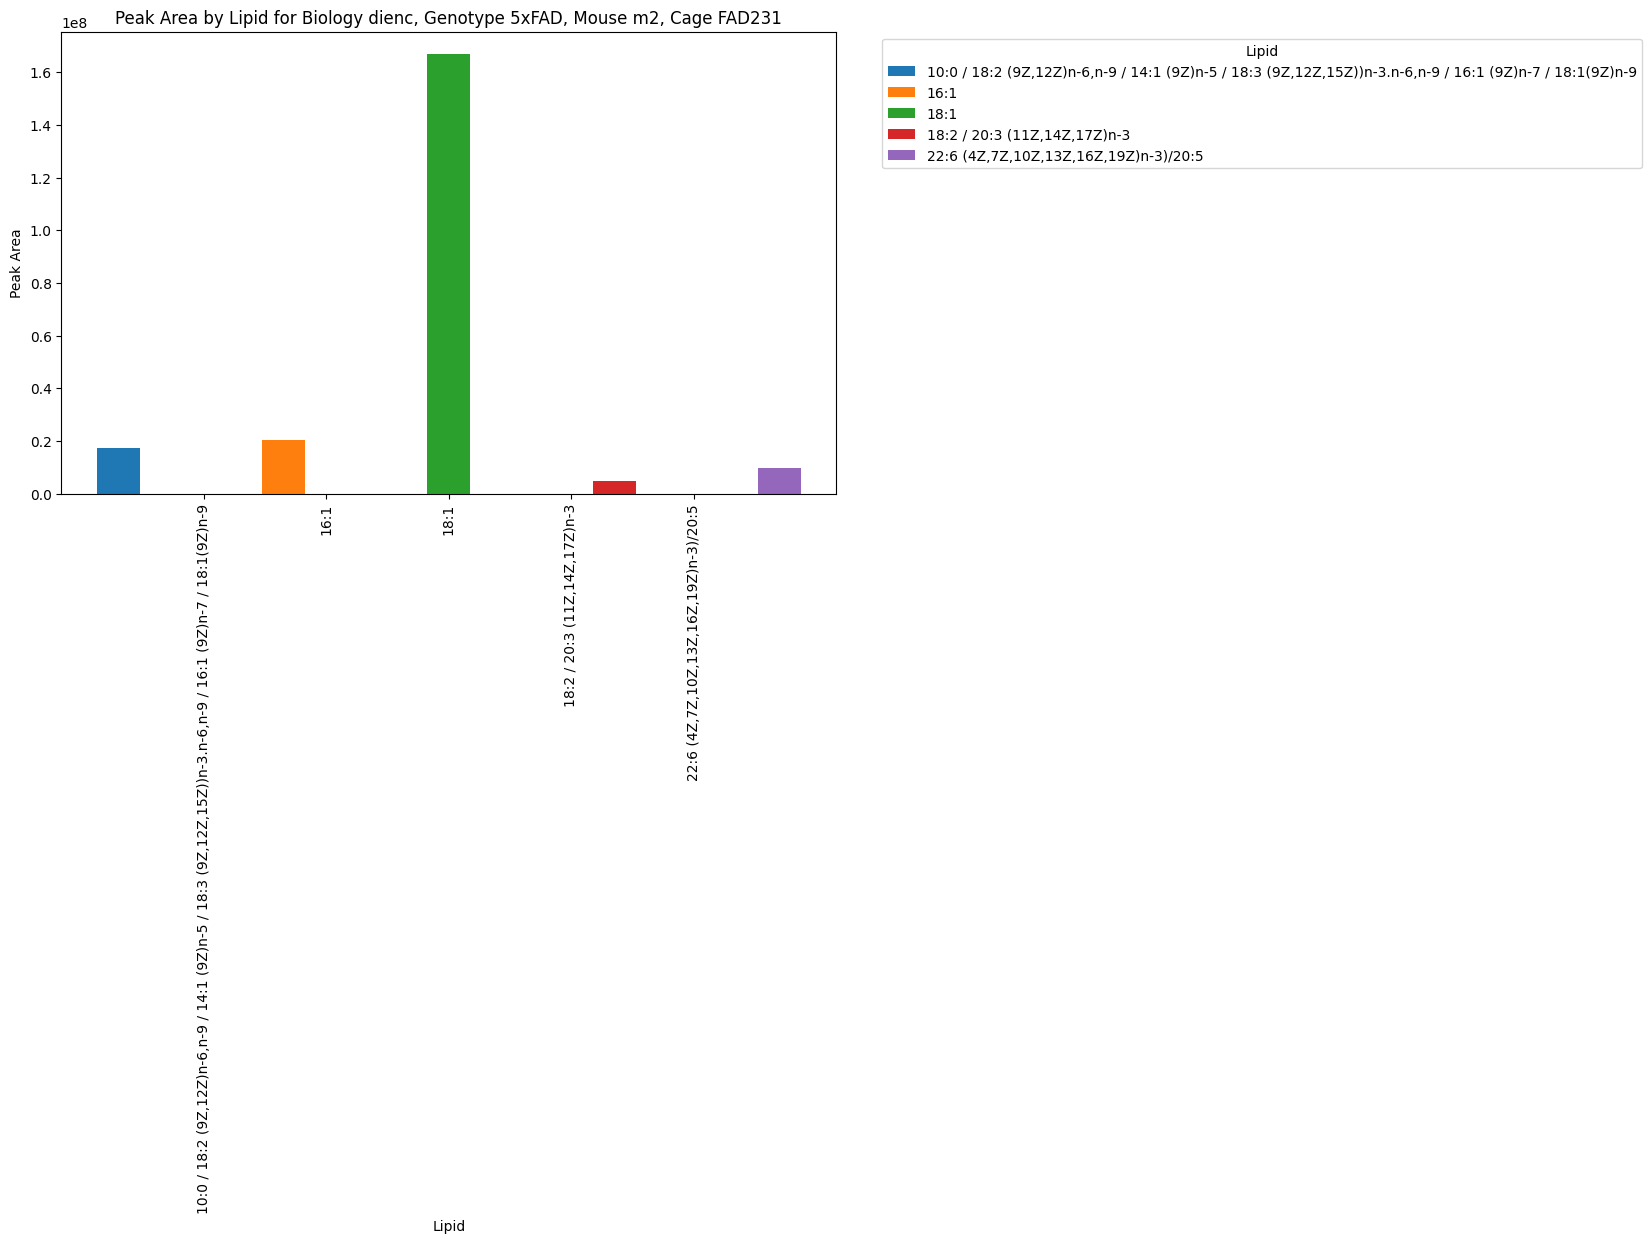

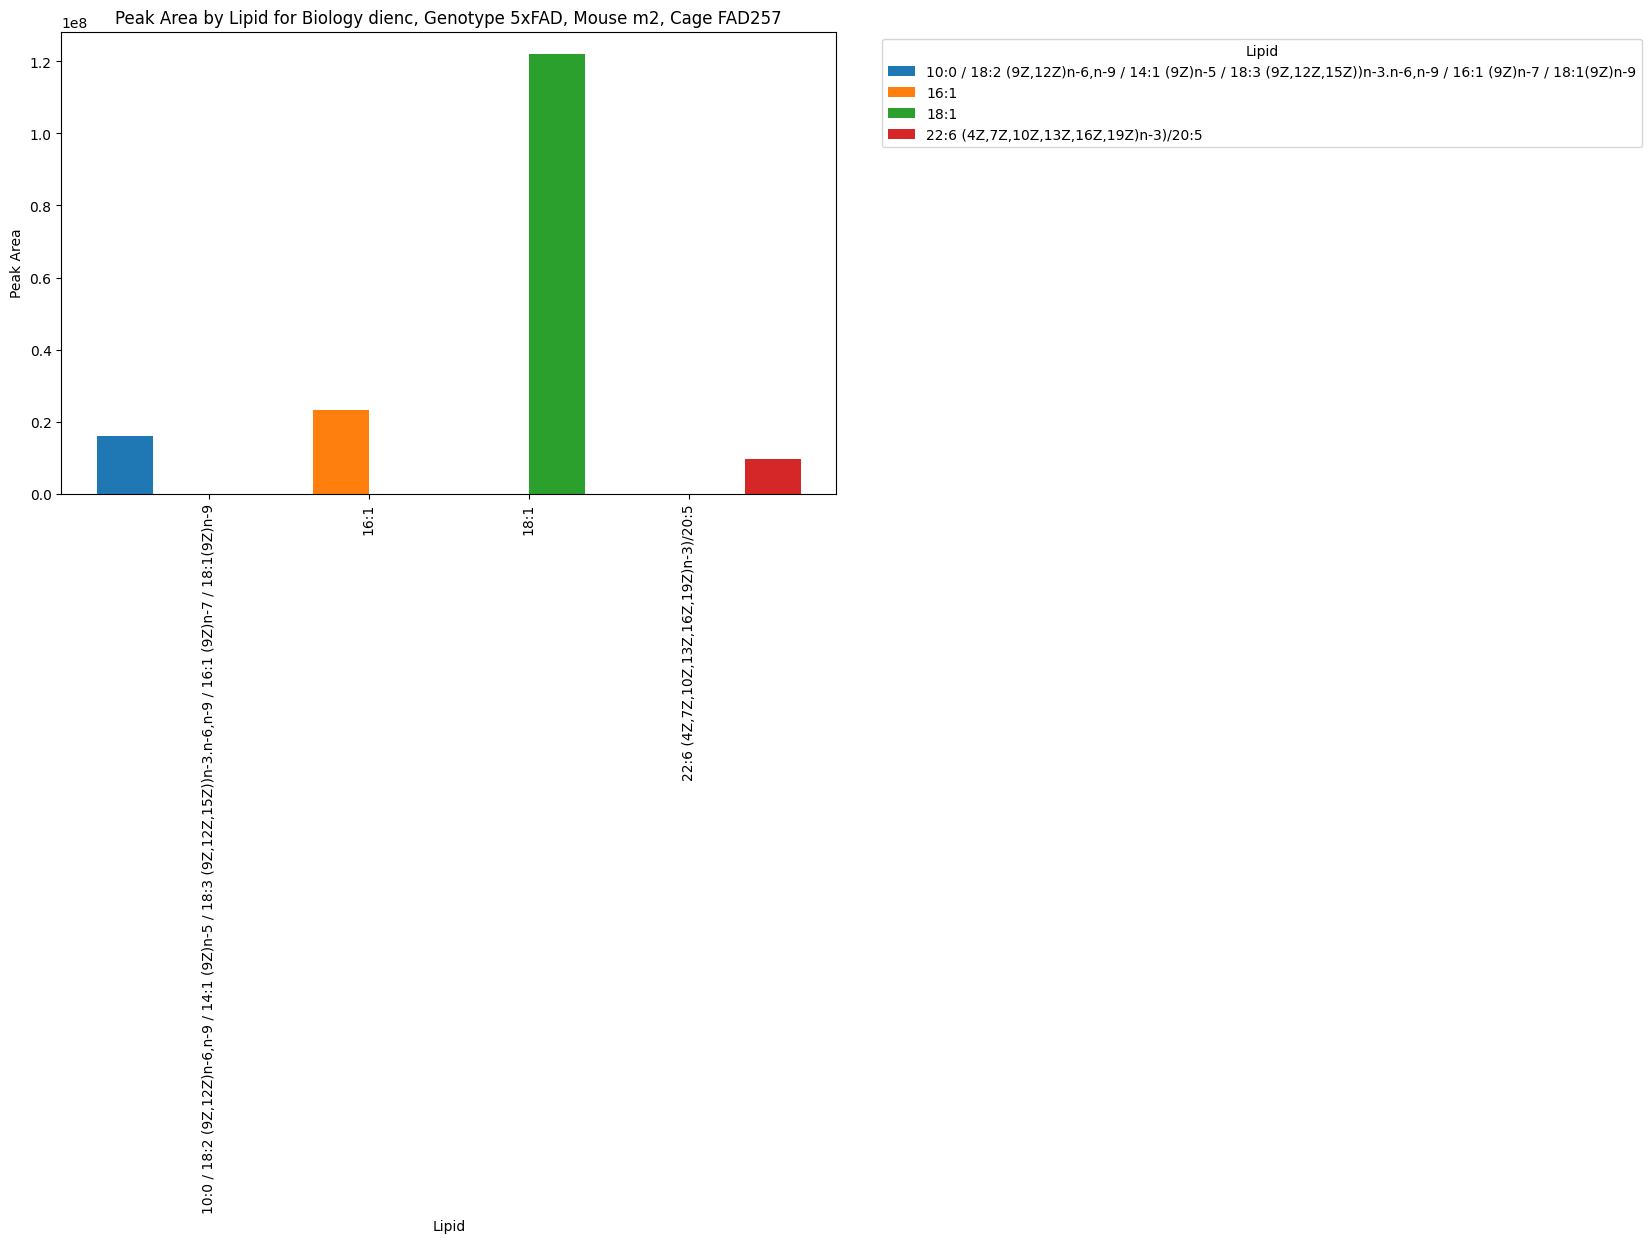

In [48]:


plot_instance.plot_bar_by_group_sample()

Directory already exists at Projects/AMP/results/test3/plots/on/


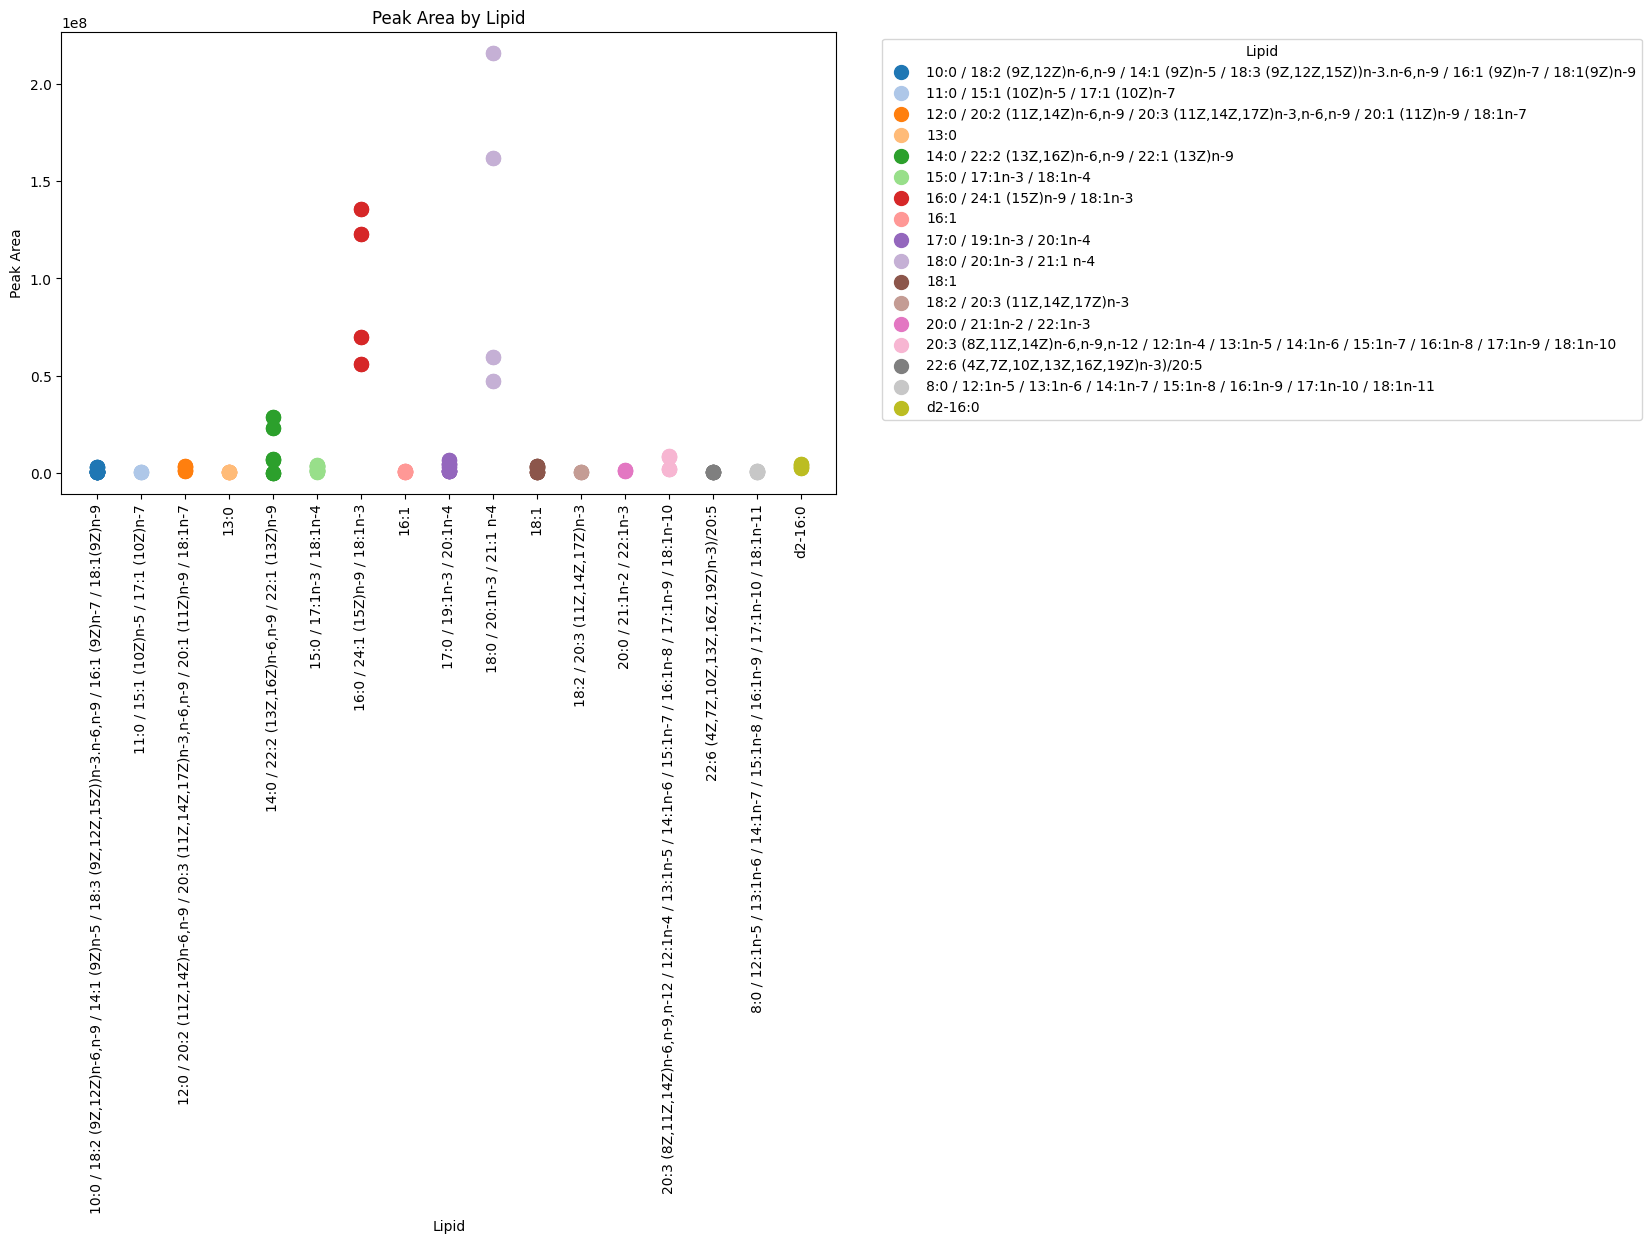

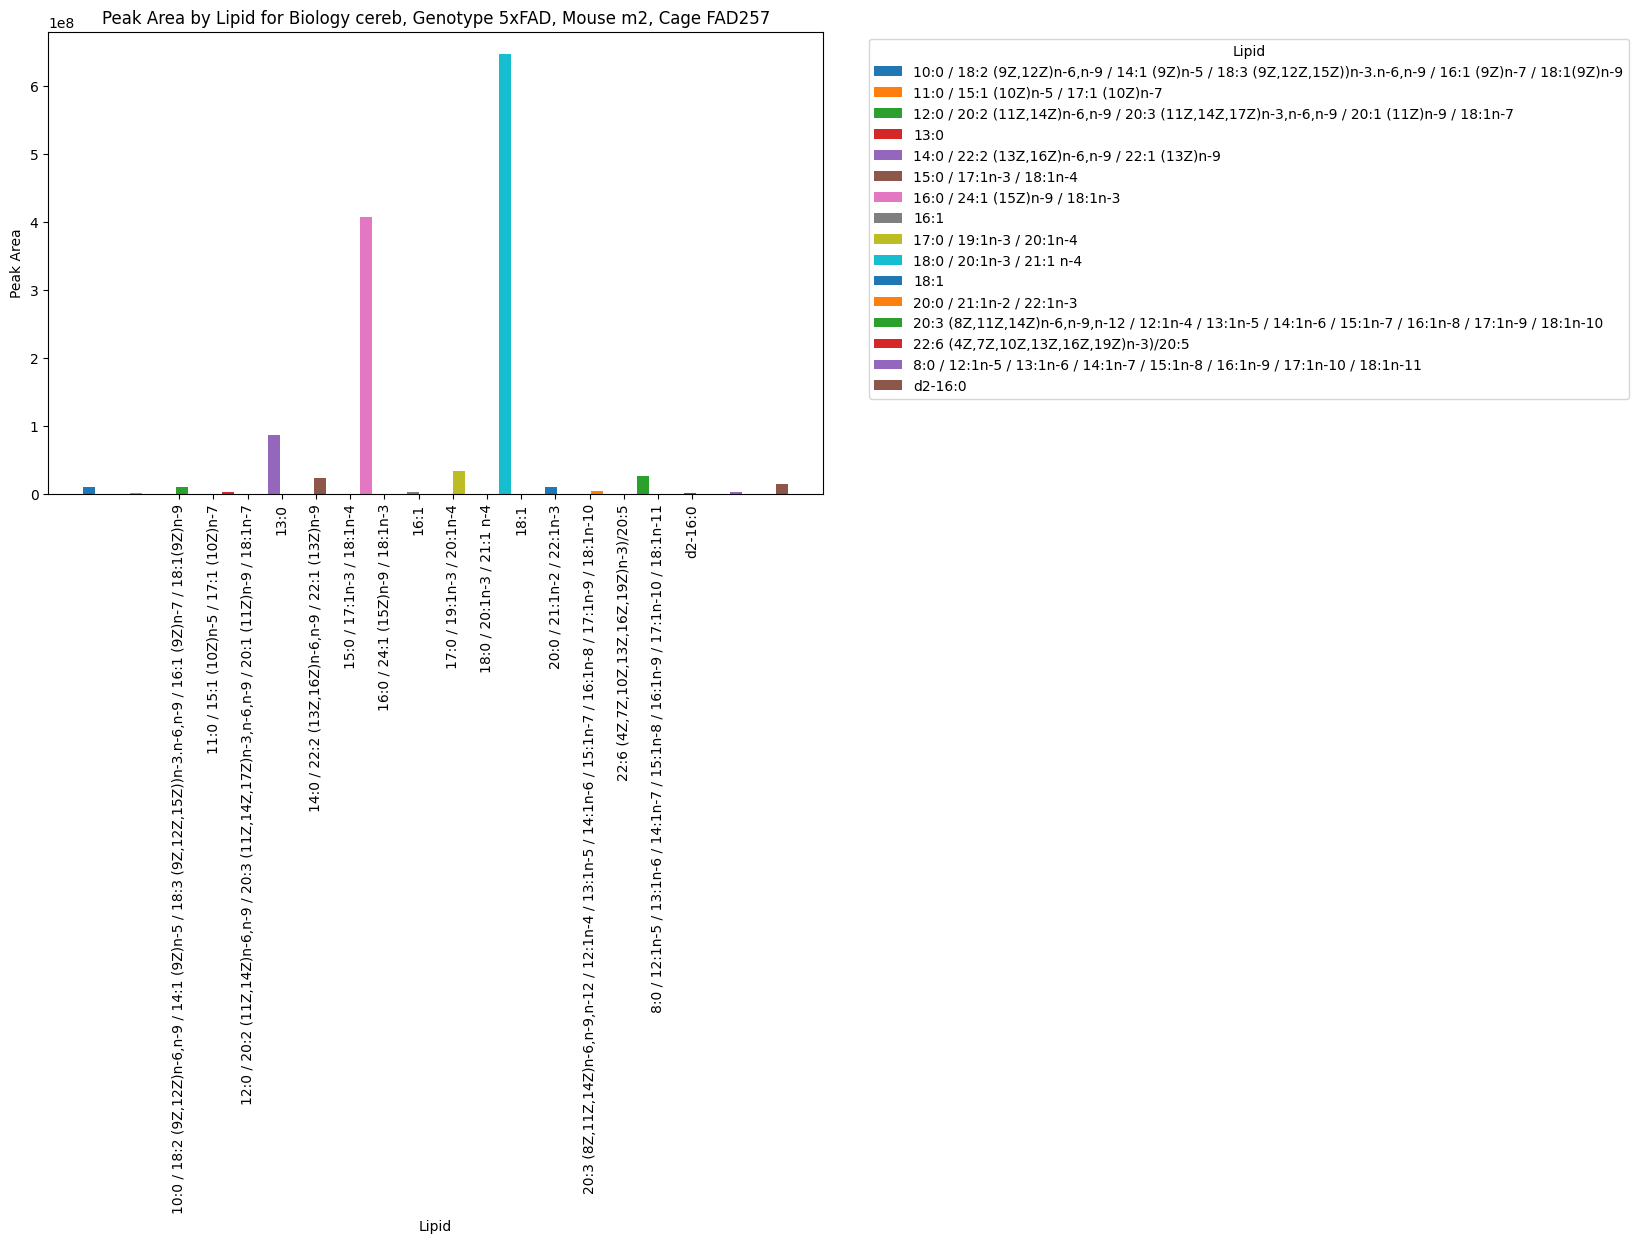

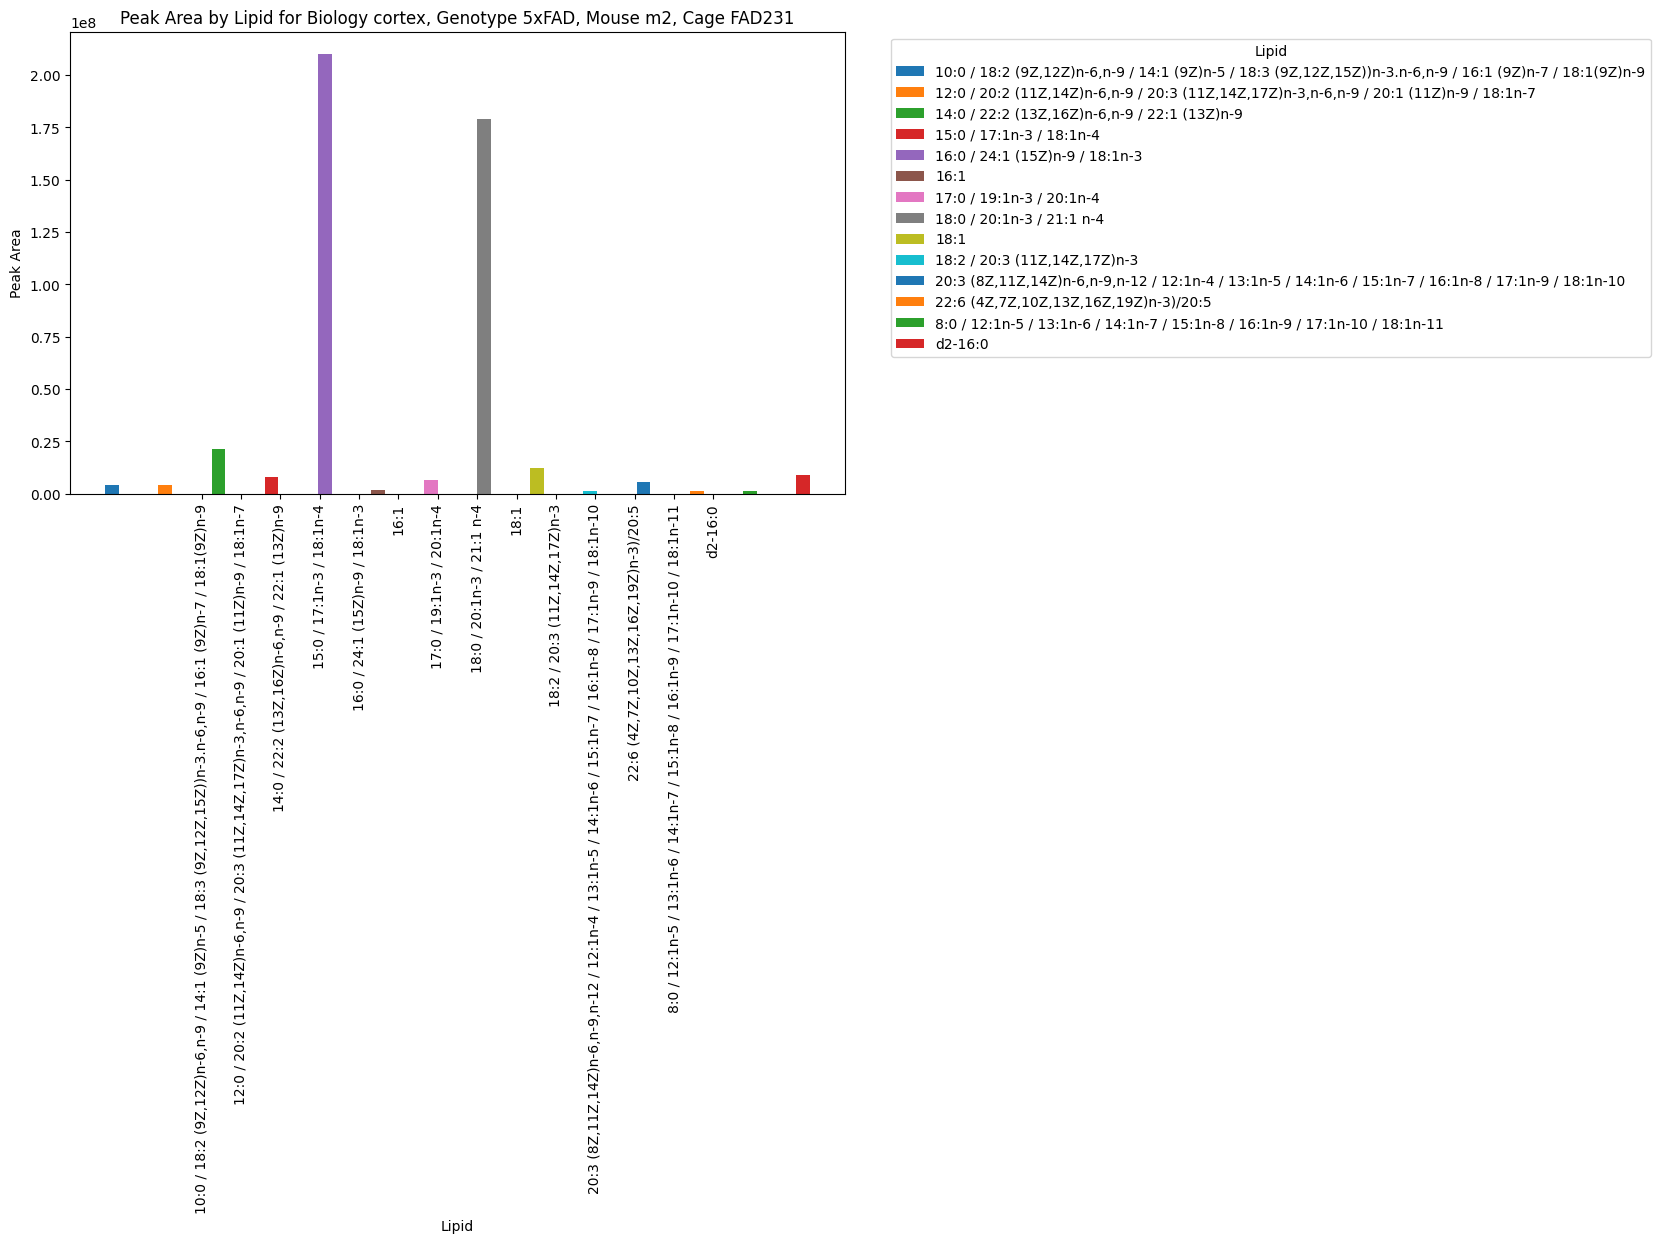

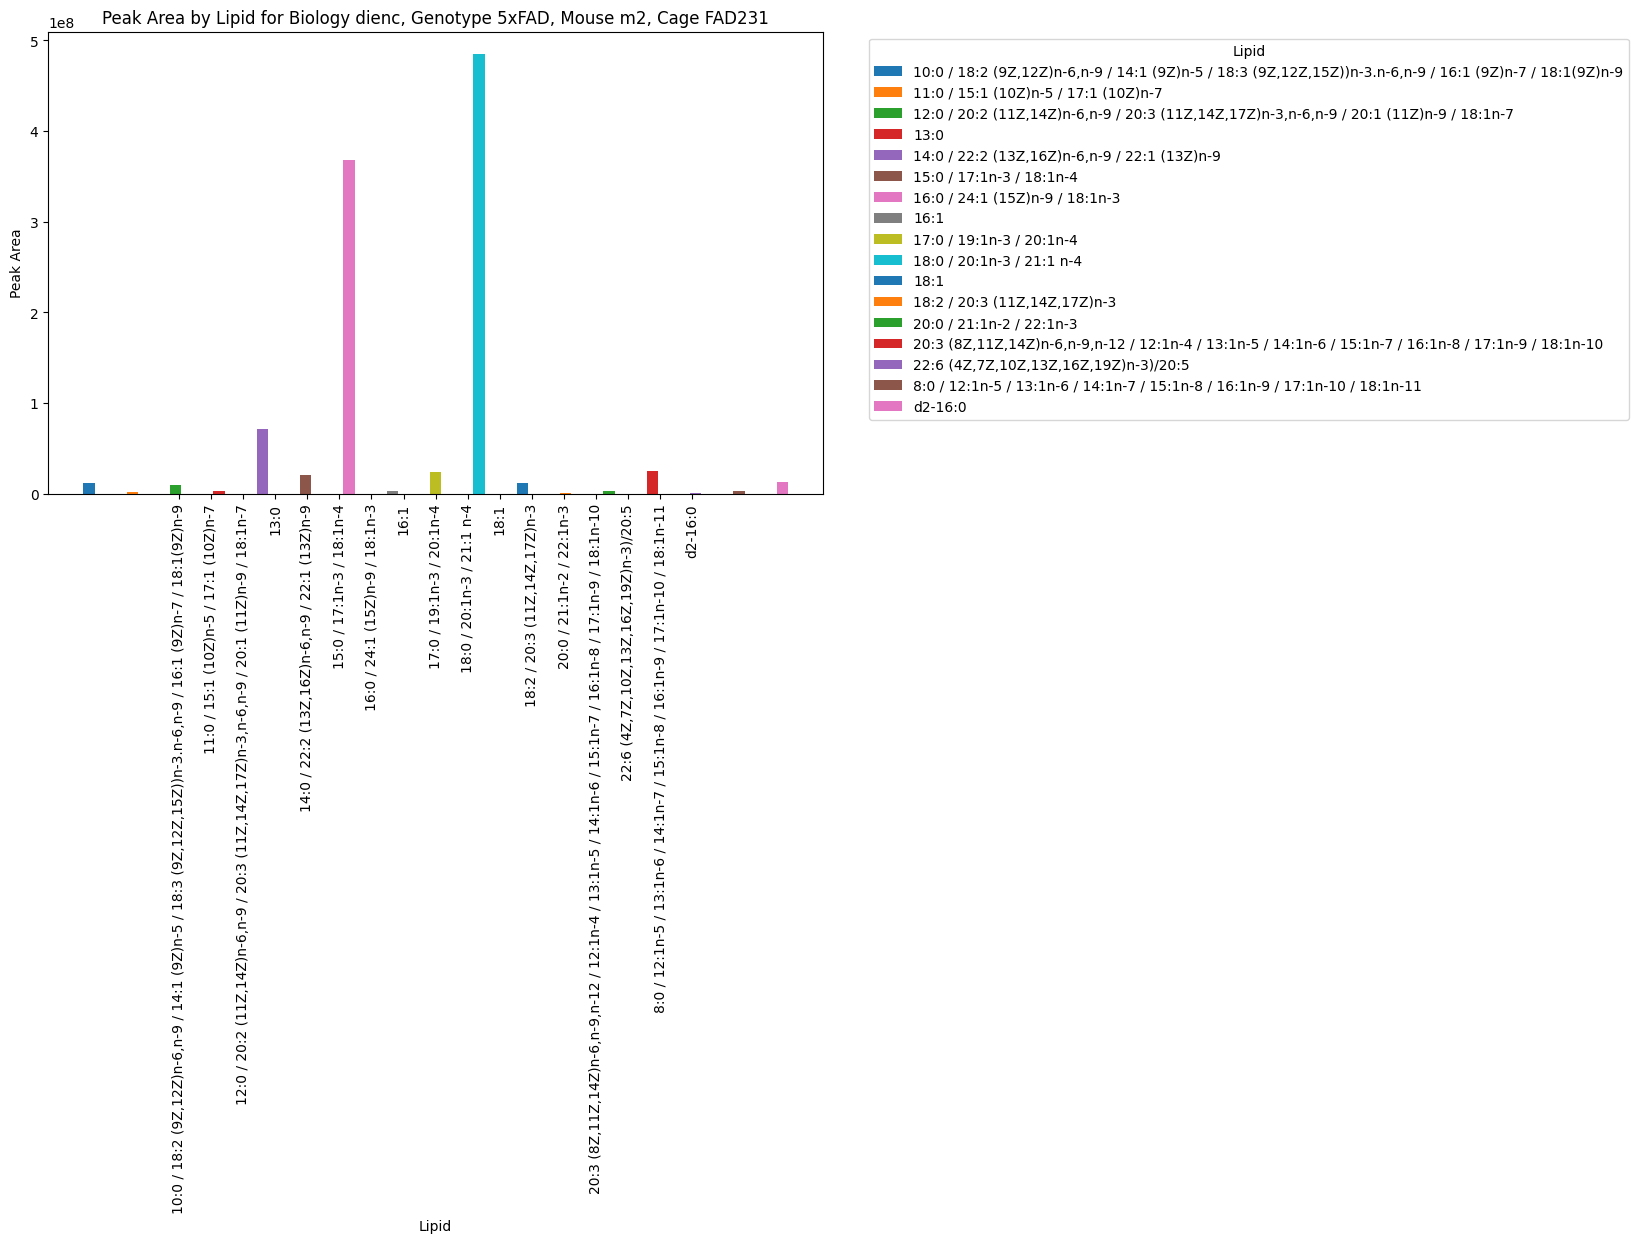

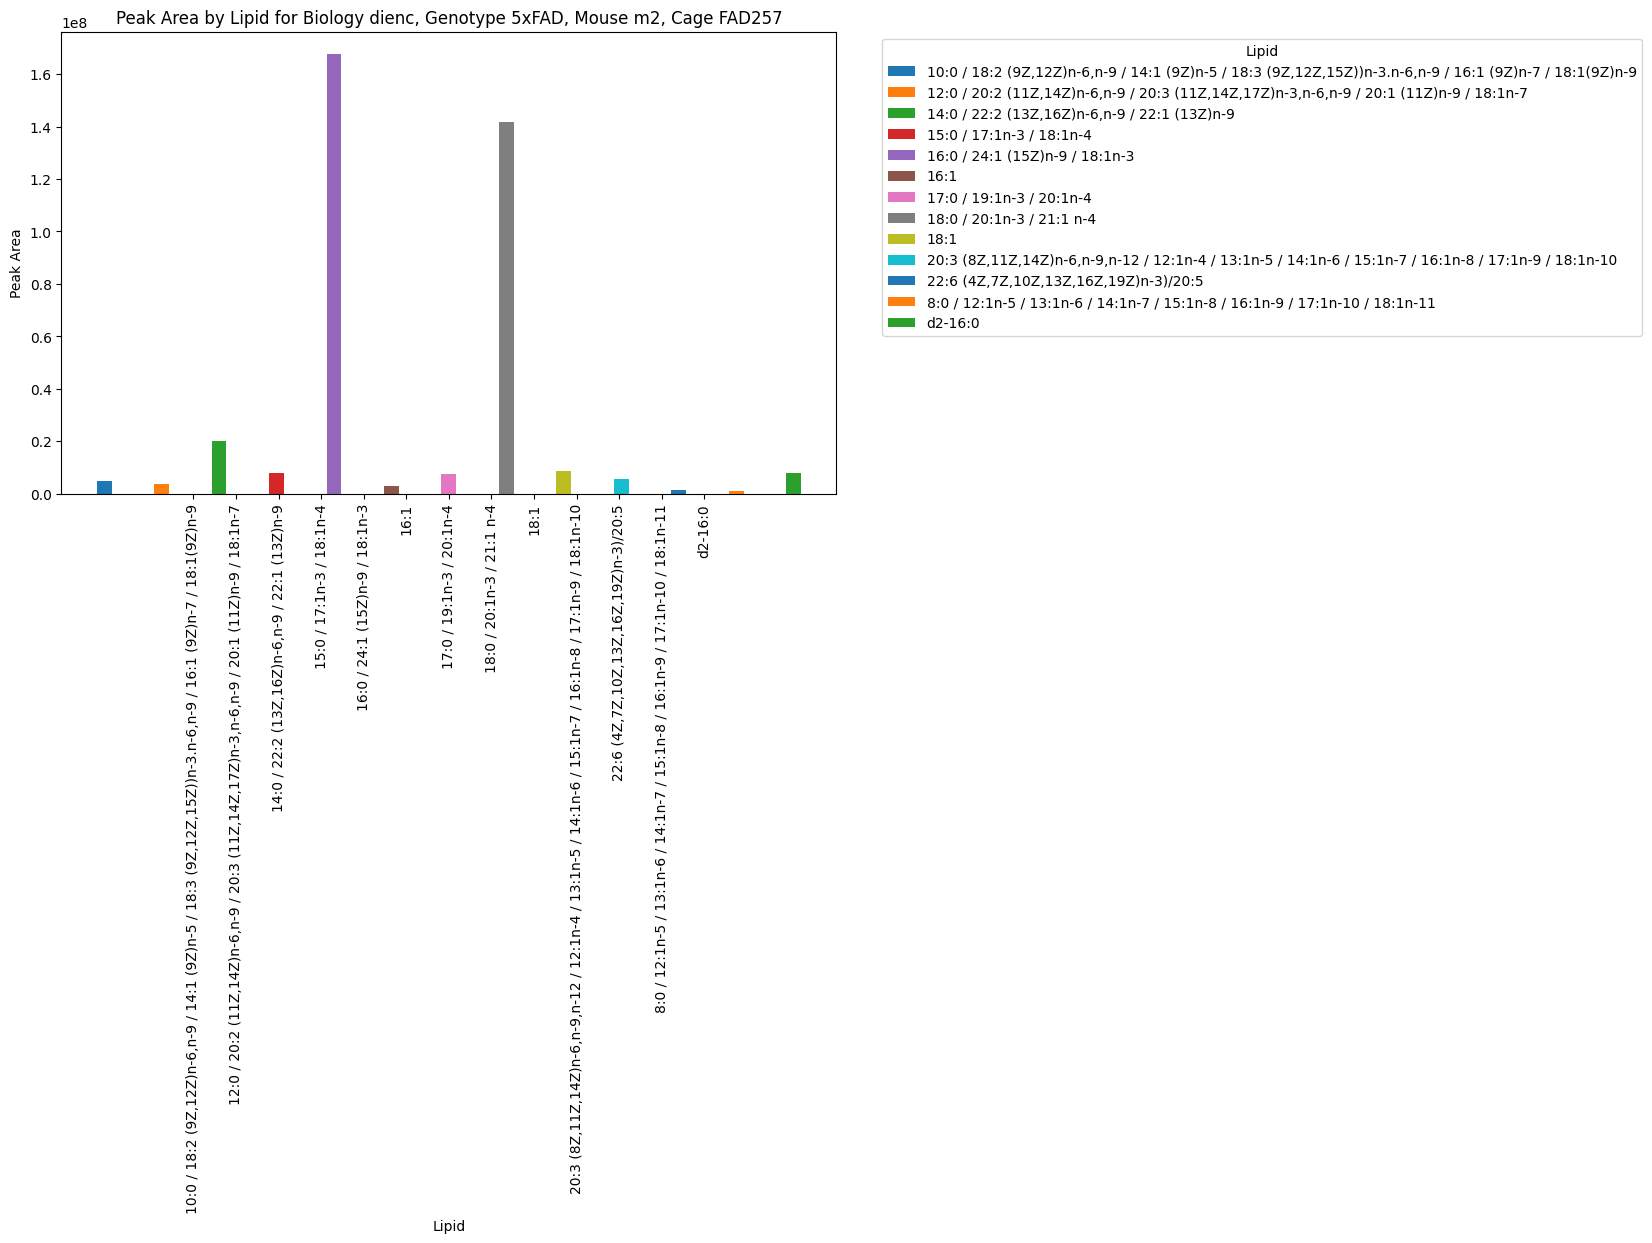

In [49]:
import OzESI_plot

# # Define the directory where the plots should be saved
# plots_directory = 'Projects/AMP/results/fame_mix/plots/on/'

# Create an instance of the Plot class with the specified directory
plot_instance = OzESI_plot.Plot(dataframe=peaks_df, plot_directory=plots_directory)

# Call the scatter method to plot data
plot_instance.scatter()


plot_instance.plot_bar_by_group_sample()